In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# importing all data to dataframe 
source_data= pd.read_csv("7060_source_data.csv");
keys_data= pd.read_csv("7060_KEYS.csv");
report = pd.read_csv("NDAP_REPORT_7060.csv");

In [11]:
# print(source_data.head());
print(source_data.columns)

Index(['srcStateName', 'Year', 'Crime head IPC ( Indian Penal Code ) Category',
       'Crime head IPC ( Indian Penal Code ) Sub-category',
       'Incidence of IPC ( Indian Penal Code ) crimes',
       'Victims of IPC ( Indian Penal Code ) crimes',
       'IPC ( Indian Penal Code ) Crime Rate'],
      dtype='object')


In [22]:
source_data.rename(columns={'srcStateName':"State","Crime head IPC ( Indian Penal Code ) Category":'IPC_Category','Crime head IPC ( Indian Penal Code ) Sub-category':'IPC_Sub_category','Incidence of IPC ( Indian Penal Code ) crimes':'Incidence_of_crime','Victims of IPC ( Indian Penal Code ) crimes':'Victims_of_crime','IPC ( Indian Penal Code ) Crime Rate':'crime_rate'},inplace = True)

In [28]:
source_data["IPC_Category"].unique()

array(['Miscellaneous IPC Crimes',
       'Offences Relating to Documents & Property Marks',
       'Offences affecting the Human Body', 'Offences against Property',
       'Offences against Public Tranquillity', 'Offences against State',
       'Other IPC Crimes', 'Total Cognizable IPC crimes'], dtype=object)

In [36]:
split_sub=source_data["IPC_Sub_category"].str.split("(",n=1,expand=True)

In [38]:
source_data["IPC_Sub_category"]=split_sub[0];

In [45]:
source_data["IPC_Sub_category"].unique()


array(['Arson ', 'Cheating by Impersonation ',
       'Circulate False/Fake News/Rumours ', 'Criminal Intimidation ',
       'Criminal Trespass ', 'Cruelty by Husband or his Relatives ',
       'Disobedience to order duly promulgated by Public Servant ',
       'Harbouring an Offender ', 'Insult to the Modesty of Women ',
       'Miscellaneous IPC Crimes',
       'Obscene Acts and Songs at Public Places ',
       'Obstruction on Public way ', 'Offences related to Mischief ',
       'Offences relating to Adulteration or Sale of Food/Drugs ',
       'Offences relating to Elections ',
       'Offences relating to Religion ', 'Rash Driving on Public way ',
       'Rash Driving on Public way |C) Causing Grievous Hurt by Rash/Negligent Driving on Public way',
       'Sale of obscene Books/Objects ',
       'Counterfeiting |A) Counterfeit Coin ',
       'Counterfeiting |B) Counterfeiting Government Stamp ',
       'Counterfeiting |C) Counterfeiting of Seal or Mark ',
       'Counterfeiting |C

In [53]:
source_data["IPC_Sub_category"].value_counts()

Rioting                                                                                                      648
Kidnapping and Abduction |Kidnapping and Abduction                                                           144
Rash Driving on Public way                                                                                   108
Theft                                                                                                        108
Burglary                                                                                                     108
                                                                                                            ... 
Assault on Women with Intent to Outrage her Modesty |Assault on Women with Intent to Outrage her Modesty      36
Assault on Women with Intent to Outrage her Modesty |Assault on Women                                         36
Abetment of Suicide                                                                             

In [478]:
report.head()

,Rowid,Country,State lgd code,State,Year,Crime head ipc ( indian penal code ) category,Crime head ipc ( indian penal code ) sub-category,Incidence of ipc ( indian penal code ) crimes,Victims of ipc ( indian penal code ) crimes,Ipc ( indian penal code ) crime rate
0,1,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,"Arson (Sec.435, 436 & 438 IPC)",187.800796,194.647700,1.4
1,2,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Cheating by Impersonation (Sec.419 IPC),0.000000,0.000000,0.0
2,3,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours (Sec.505 IPC...,12.715679,12.715679,0.1
3,4,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Intimidation (Sec.506 r/w Other IPC C...,42.059553,46.950199,0.3
4,5,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Trespass (Sec.447 to 452 IPC),1106.264063,1146.367358,8.4


In [64]:
report["Country"].unique()

array(['India'], dtype=object)

In [60]:
report.columns

Index(['Rowid', 'Country', 'State lgd code', 'State', 'Year',
       'Crime head ipc ( indian penal code ) category',
       'Crime head ipc ( indian penal code ) sub-category',
       'Incidence of ipc ( indian penal code ) crimes',
       'Victims of ipc ( indian penal code ) crimes',
       'Ipc ( indian penal code ) crime rate'],
      dtype='object')

In [70]:
# report dataframe contains the scaled data of the crimes and we proceed to perform all analysis based on this dataframe 
report_final=pd.DataFrame();

report_final[['State','Year','Category','Sub_category','Incidence','Victims','Crime_rate']]=report[['State', 'Year',
       'Crime head ipc ( indian penal code ) category',
       'Crime head ipc ( indian penal code ) sub-category',
       'Incidence of ipc ( indian penal code ) crimes',
       'Victims of ipc ( indian penal code ) crimes',
       'Ipc ( indian penal code ) crime rate']]

In [75]:
report_final.head()

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
0,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,"Arson (Sec.435, 436 & 438 IPC)",187.800796,194.647700,1.4
1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Cheating by Impersonation (Sec.419 IPC),0.000000,0.000000,0.0
2,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours (Sec.505 IPC...,12.715679,12.715679,0.1
3,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Intimidation (Sec.506 r/w Other IPC C...,42.059553,46.950199,0.3
4,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Trespass (Sec.447 to 452 IPC),1106.264063,1146.367358,8.4


In [78]:
split_sub=report_final["Sub_category"].str.split("(",n=1,expand=True)
report_final['Sub_category']=split_sub[0]
report_final.head()

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
0,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Arson,187.800796,194.647700,1.4
1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Cheating by Impersonation,0.000000,0.000000,0.0
2,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours,12.715679,12.715679,0.1
3,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Intimidation,42.059553,46.950199,0.3
4,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Trespass,1106.264063,1146.367358,8.4


In [84]:
report_final["State"].unique()

array(['Jammu And Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Mizoram', 'Uttarakhand', 'Haryana', 'Delhi', 'Puducherry',
       'Rajasthan', 'Uttar Pradesh', 'Sikkim', 'Bihar', 'Manipur',
       'Arunachal Pradesh', 'Nagaland', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Andaman And Nicobar Islands', 'Telangana', 'Ladakh',
       'The Dadra And Nagar Haveli And Daman And Diu'], dtype=object)

In [95]:
report_final['Sub_category'].value_counts()

Rioting                                                      648
Kidnapping and Abduction |Kidnapping and Abduction           144
Theft                                                        108
Burglary                                                     108
Rash Driving on Public way                                   108
                                                            ... 
Causing Death by Negligence |Causing Death by Negligence      36
Buying of Minors for Prostitution                             36
Attempt to Commit Suicide                                     36
Attempt to Commit Rape                                        36
Total Cognizable IPC crimes                                   36
Name: Sub_category, Length: 116, dtype: int64

In [483]:
# pd.set_option('display.max_rows',None, "display.max_columns", None)

report_final['Sub_category'].unique()

array(['Arson ', 'Cheating by Impersonation ',
       'Circulate False/Fake News/Rumours ', 'Criminal Intimidation ',
       'Criminal Trespass ', 'Cruelty by Husband or his Relatives ',
       'Disobedience to order duly promulgated by Public Servant ',
       'Harbouring an Offender ', 'Insult to the Modesty of Women ',
       'Miscellaneous IPC Crimes',
       'Obscene Acts and Songs at Public Places ',
       'Obstruction on Public way ', 'Offences related to Mischief ',
       'Offences relating to Adulteration or Sale of Food/Drugs ',
       'Offences relating to Elections ',
       'Offences relating to Religion ',
       'Rash Driving on Public way |C) Causing Grievous Hurt by Rash/Negligent Driving on Public way',
       'Rash Driving on Public way ', 'Sale of obscene Books/Objects ',
       'Abetment of Suicide ',
       'Assault on Women with Intent to Outrage her Modesty |Assault on Women ',
       'Assault on Women with Intent to Outrage her Modesty |Assault on Women with 

In [113]:
report_final['Sub_category'].value_counts()

Rioting                                                      648
Kidnapping and Abduction |Kidnapping and Abduction           144
Theft                                                        108
Burglary                                                     108
Rash Driving on Public way                                   108
                                                            ... 
Causing Death by Negligence |Causing Death by Negligence      36
Buying of Minors for Prostitution                             36
Attempt to Commit Suicide                                     36
Attempt to Commit Rape                                        36
Total Cognizable IPC crimes                                   36
Name: Sub_category, Length: 116, dtype: int64

In [457]:
#making a dataframe of the total values of the crimes
total_crimes=report_final[report_final['Sub_category']=='Total Cognizable IPC crimes']
total_crimes
report_final[report_final["State"]=="Maharashtra"]

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
3409,Maharashtra,2018,Miscellaneous IPC Crimes,Arson,1312.0,1342.0,1.100000
3410,Maharashtra,2018,Miscellaneous IPC Crimes,Cheating by Impersonation,29.0,29.0,0.000000
3411,Maharashtra,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours,23.0,23.0,0.000000
3412,Maharashtra,2018,Miscellaneous IPC Crimes,Criminal Intimidation,587.0,625.0,0.500000
3413,Maharashtra,2018,Miscellaneous IPC Crimes,Criminal Trespass,3256.0,3399.0,2.700000
3414,Maharashtra,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,6862.0,6882.0,11.766118
3415,Maharashtra,2018,Miscellaneous IPC Crimes,Disobedience to order duly promulgated by Publ...,3538.0,3544.0,2.900000
3416,Maharashtra,2018,Miscellaneous IPC Crimes,Harbouring an Offender,2.0,2.0,0.000000
3417,Maharashtra,2018,Miscellaneous IPC Crimes,Insult to the Modesty of Women,1074.0,1092.0,1.841564
3418,Maharashtra,2018,Miscellaneous IPC Crimes,Miscellaneous IPC Crimes,92323.0,95134.0,76.100000


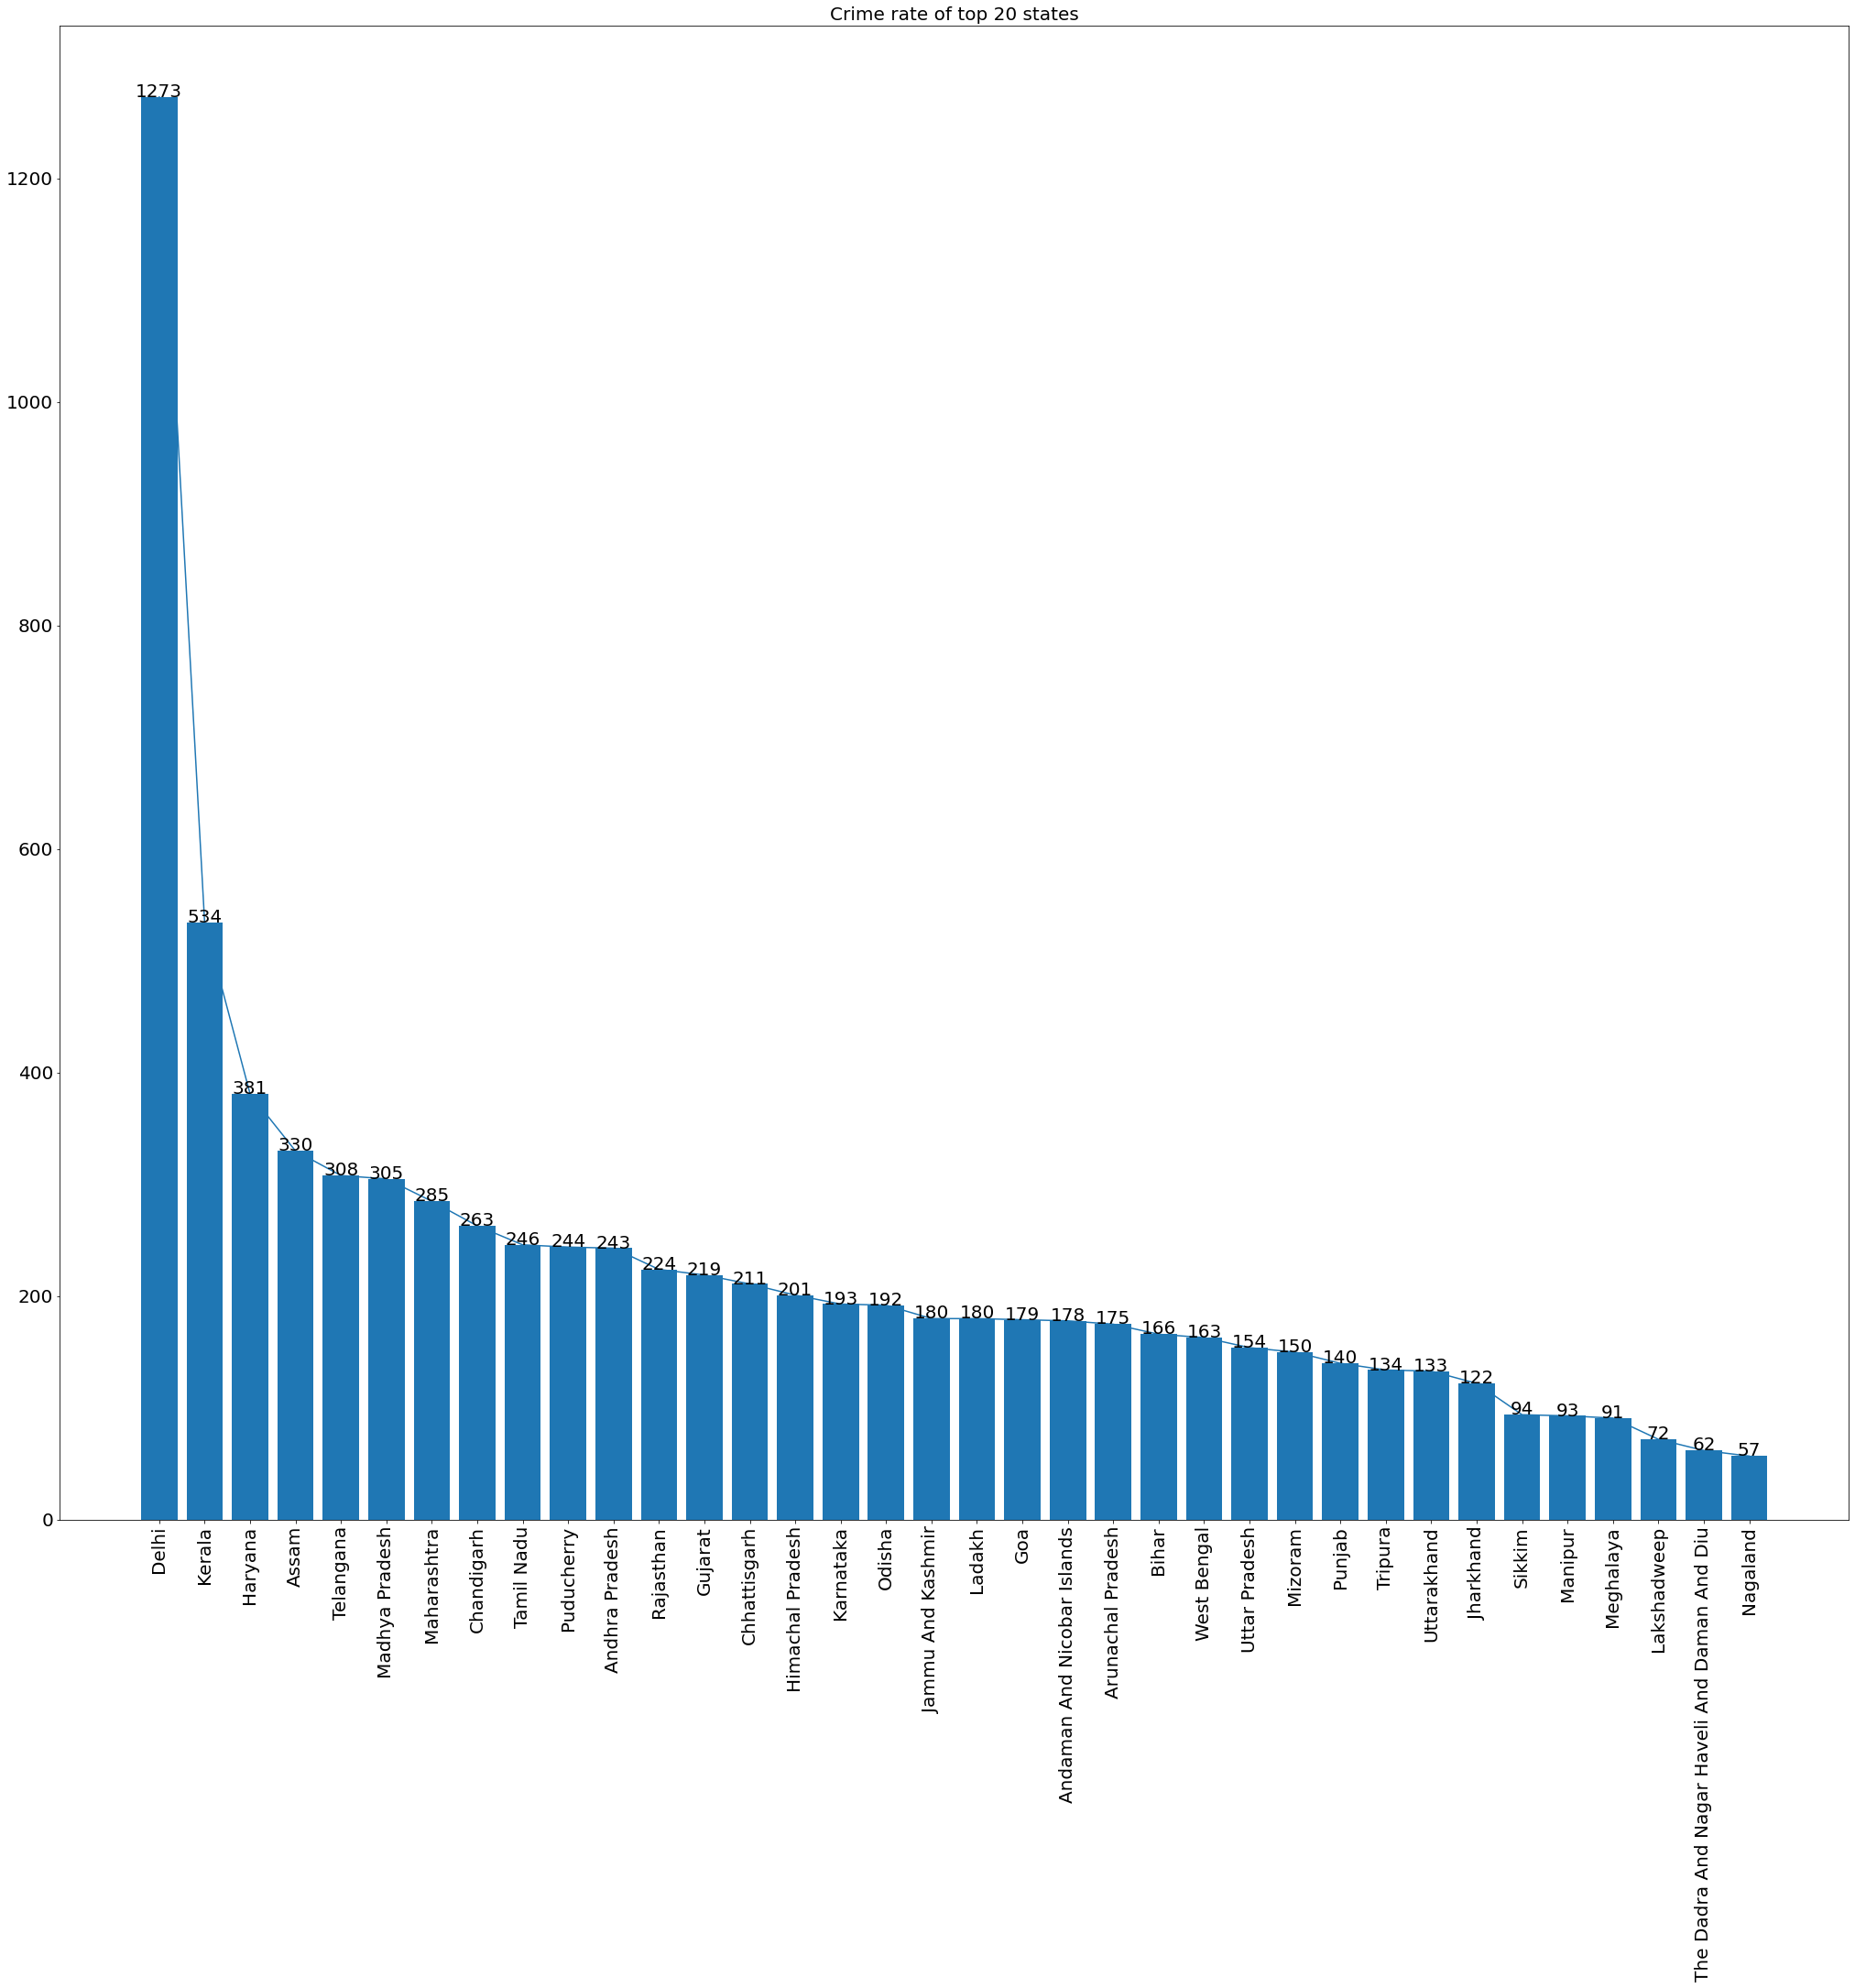

In [218]:
#plot of total crime rate of top 20 states in India
totalCrimeRate=total_crimes.sort_values("Crime_rate",ascending=False)["Crime_rate"].round().astype(int)
state=total_crimes.sort_values("Crime_rate",ascending=False)["State"]
# plt.figure().set_size_inches(30,20)
plt.figure(figsize=(35,30))
plt.title("Crime rate of top 20 states",size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.plot(state,totalCrimeRate)
plt.bar(state,totalCrimeRate,align="center")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state),np.array(totalCrimeRate))
# xy_df=pd.DataFrame();
# xy_df["x"]=x
# xy_df["y"]=y
# xy_df

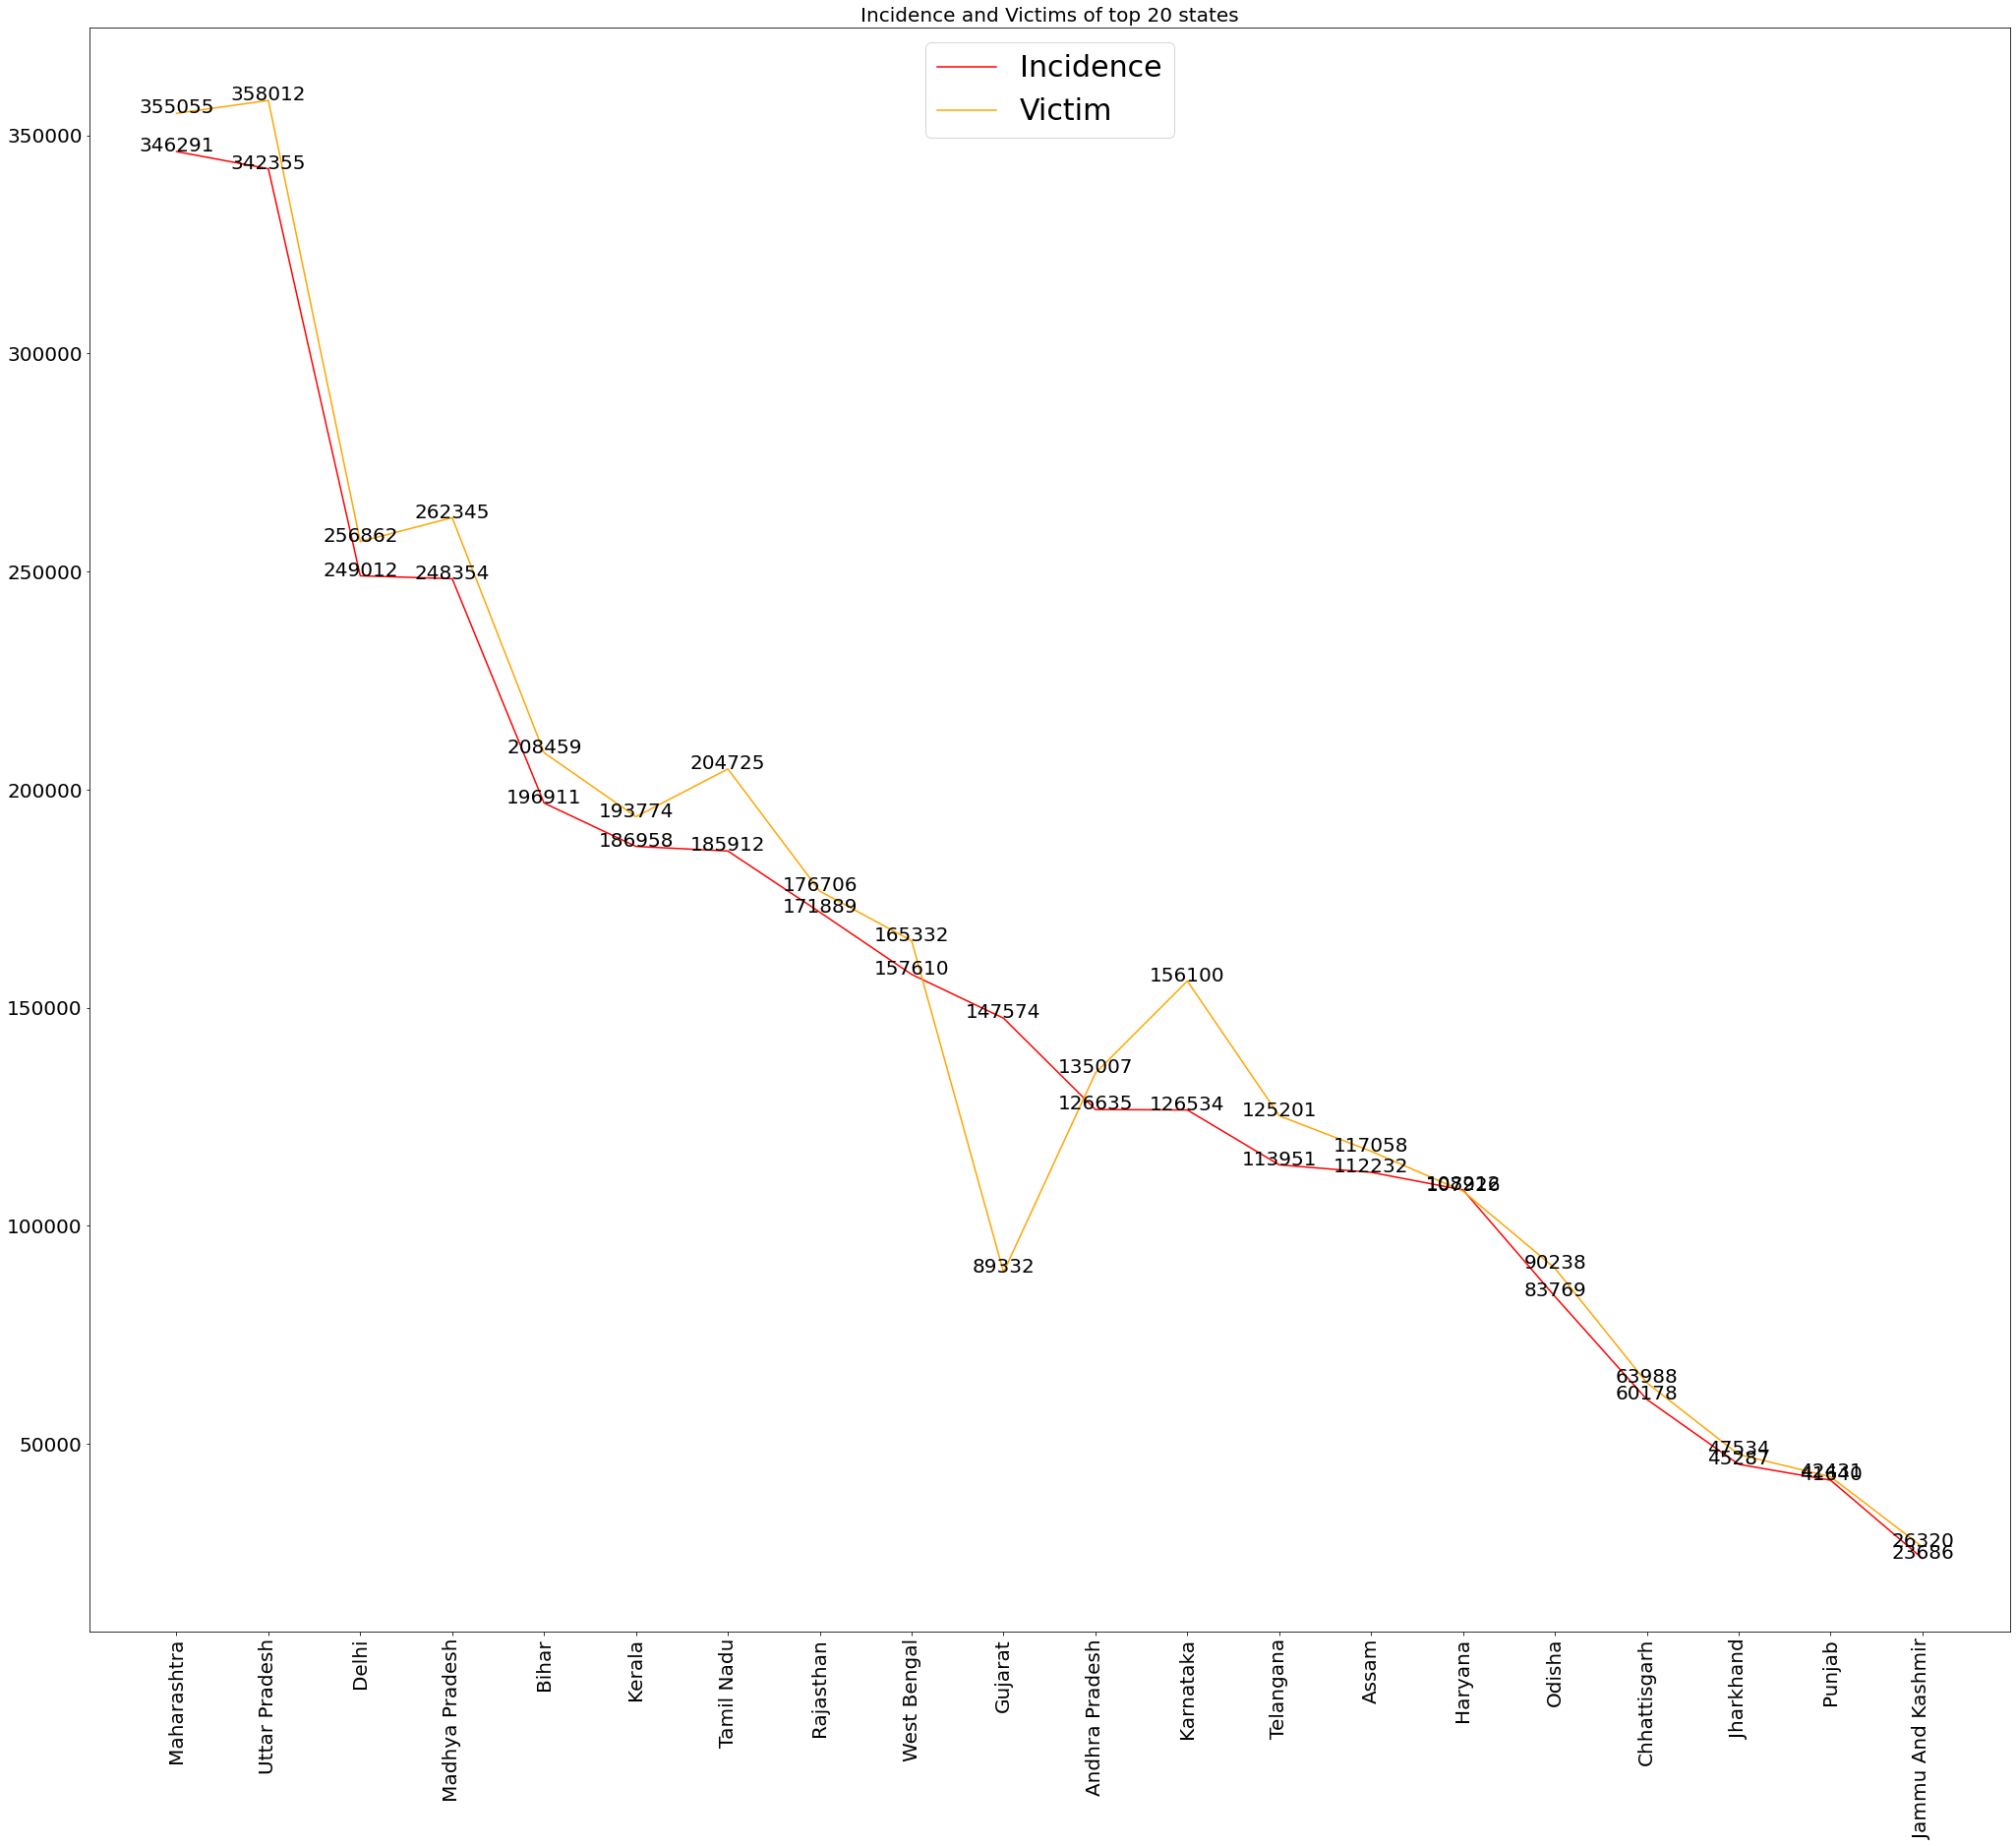

In [487]:
#plot of total incidents and total victims in different states
total_inci=total_crimes.sort_values("Incidence",ascending=False)["Incidence"].round().astype(int)[0:20]
total_vic=total_crimes.sort_values("Incidence",ascending=False)["Victims"].round().astype(int)[0:20]
state=total_crimes.sort_values("Incidence",ascending=False)["State"][0:20]
# plt.figure().set_size_inches(30,20)
plt.figure(figsize=(35,30))
plt.title("Incidence and Victims of top 20 states",size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.plot(state,total_inci,color="red")
plt.plot(state,total_vic,color="orange")
# plt.bar(state,totalCrimeRate,align="center")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state),np.array(total_inci))
addlabels(np.array(state),np.array(total_vic))
plt.legend(['Incidence', 'Victim'],fontsize=30,loc='upper center')

In [496]:
report_final[report_final["State"]=="Gujarat"]

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
3267,Gujarat,2018,Miscellaneous IPC Crimes,Arson,278.0,275.0,0.400000
3268,Gujarat,2018,Miscellaneous IPC Crimes,Cheating by Impersonation,20.0,20.0,0.000000
3269,Gujarat,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours,10.0,10.0,0.000000
3270,Gujarat,2018,Miscellaneous IPC Crimes,Criminal Intimidation,14212.0,14630.0,21.100000
3271,Gujarat,2018,Miscellaneous IPC Crimes,Criminal Trespass,412.0,428.0,0.600000
3272,Gujarat,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,2923.0,2928.0,9.114437
3273,Gujarat,2018,Miscellaneous IPC Crimes,Disobedience to order duly promulgated by Publ...,5271.0,0.0,7.800000
3274,Gujarat,2018,Miscellaneous IPC Crimes,Harbouring an Offender,7.0,6.0,0.000000
3275,Gujarat,2018,Miscellaneous IPC Crimes,Insult to the Modesty of Women,12.0,12.0,0.037418
3276,Gujarat,2018,Miscellaneous IPC Crimes,Miscellaneous IPC Crimes,93929.0,32717.0,139.500000


In [294]:
#making a dataframe contaning the individual crimes and removing the rows of totals
report_final_totalremoved=report_final[report_final["Sub_category"].str.contains("Total Cognizable IPC crimes")==False]
report_final_totalremoved
report_final_totalremoved["Sub_category"]=report_final_totalremoved["Sub_category"].str.strip()
# report_final_totalremoved["Sub_category"]=="Arson"

C:\Users\anish\AppData\Local\Temp/ipykernel_26084/615228761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_final_totalremoved["Sub_category"]=report_final_totalremoved["Sub_category"].str.strip()


In [364]:
l1=pd.DataFrame(report_final_totalremoved.groupby("State")["Crime_rate"].max())

In [326]:
#finding the crime with max crime rate in each city
idx=report_final_totalremoved.groupby(["State"])['Crime_rate'].transform(max)==report_final_totalremoved['Crime_rate']
report_final_totalremoved[idx].sort_values("Crime_rate",ascending=False)

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
949,Delhi,2018,Offences against Property,Offences against Property,202861.000000,206677.000000,1037.100000
4128,Kerala,2018,Miscellaneous IPC Crimes,Miscellaneous IPC Crimes,129242.000000,134553.000000,369.200000
806,Haryana,2018,Offences against Property,Offences against Property,39824.000000,39827.000000,140.200000
3276,Gujarat,2018,Miscellaneous IPC Crimes,Miscellaneous IPC Crimes,93929.000000,32717.000000,139.500000
3202,Madhya Pradesh,2018,Offences affecting the Human Body,Offences Affecting the Human Body,112136.000000,117496.000000,137.600000
521,Chandigarh,2018,Offences against Property,Offences against Property,1595.000000,1593.000000,136.300000
2492,Assam,2018,Offences affecting the Human Body,Offences Affecting the Human Body,43503.000000,44887.000000,127.800000
1361,Bihar,2018,Offences affecting the Human Body,Offences Affecting the Human Body,130429.000000,137659.000000,110.200000
3503,Maharashtra,2018,Offences against Property,Offences against Property,131597.000000,132088.000000,108.400000
2084,Mizoram,2018,Offences against Property,Offences against Property,1215.000000,1217.000000,102.600000


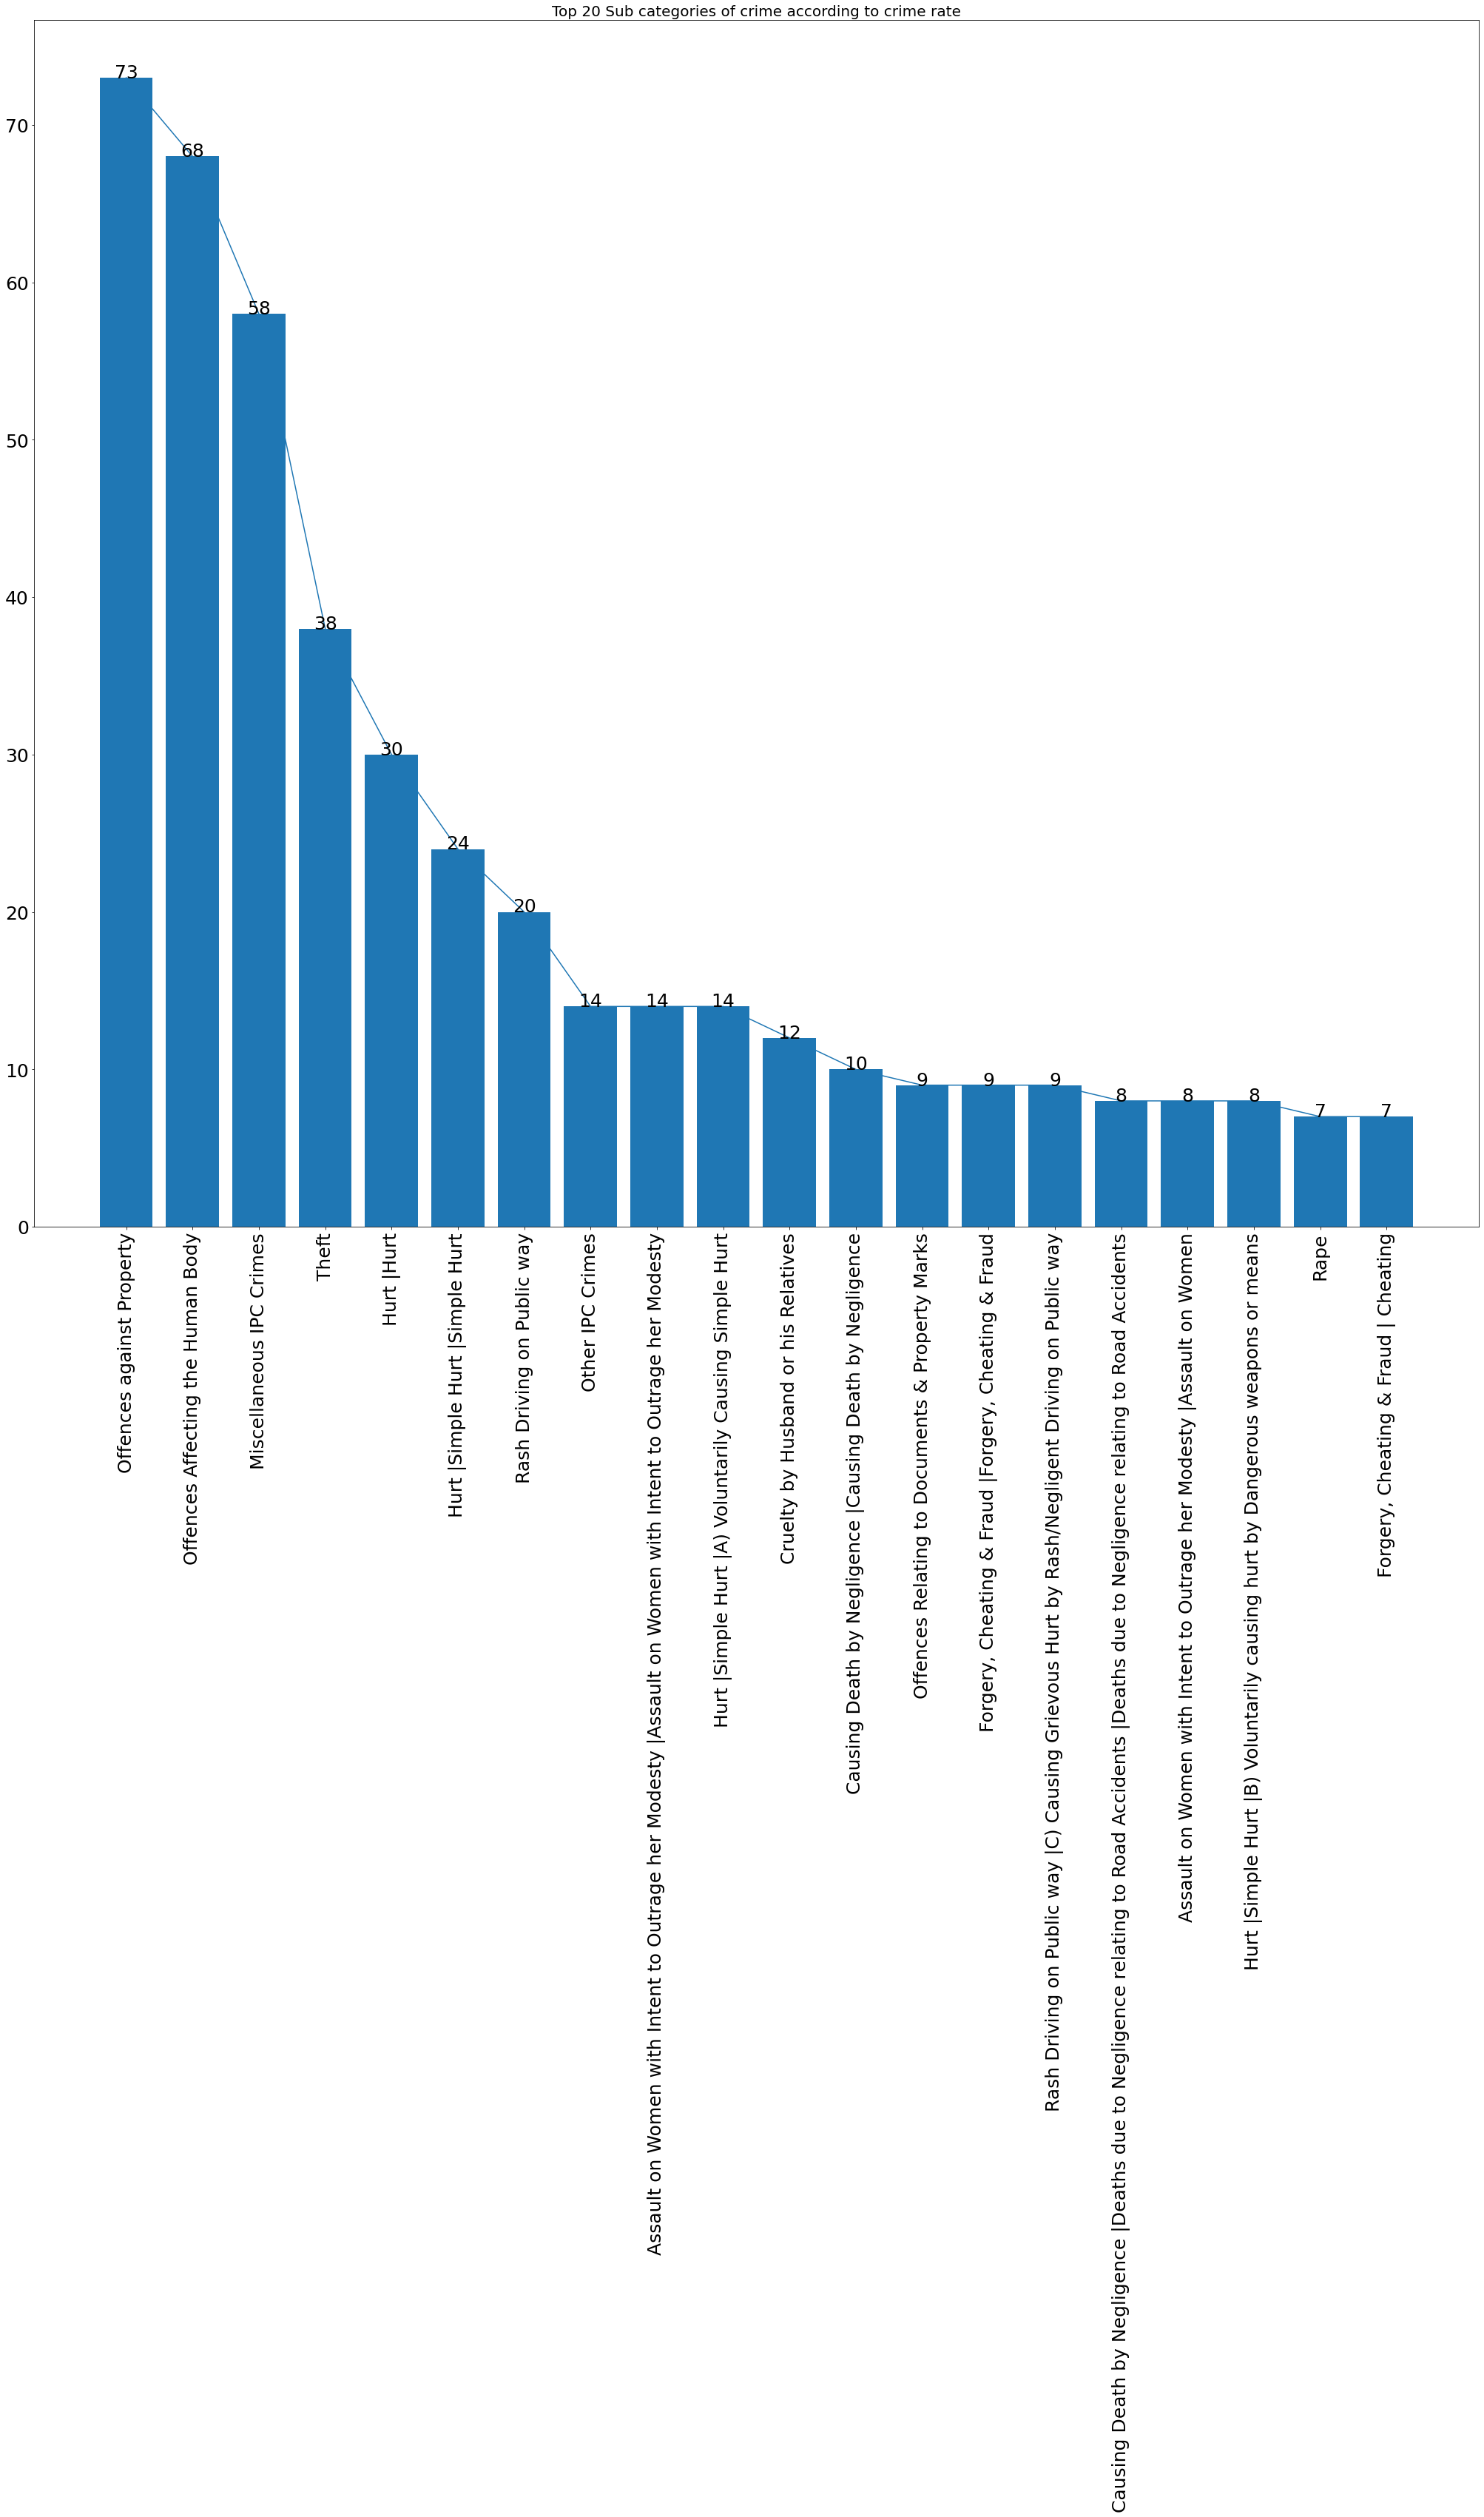

In [489]:
#Top 20 sub categories of Cime according to higher crime rate
sub_cat=pd.DataFrame(report_final_totalremoved.groupby("Sub_category")["Crime_rate"].mean()).sort_values("Crime_rate",ascending=False).round().astype(int)[0:20]
plt.figure(figsize=(35,30))
plt.title("Top 20 Sub categories of crime according to crime rate",size=20)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks(rotation = 90)
plt.plot(sub_cat.index,sub_cat["Crime_rate"])
plt.bar(sub_cat.index,sub_cat["Crime_rate"],align="center")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=25,ha="center");        
addlabels(np.array(sub_cat.index),np.array(sub_cat["Crime_rate"]))

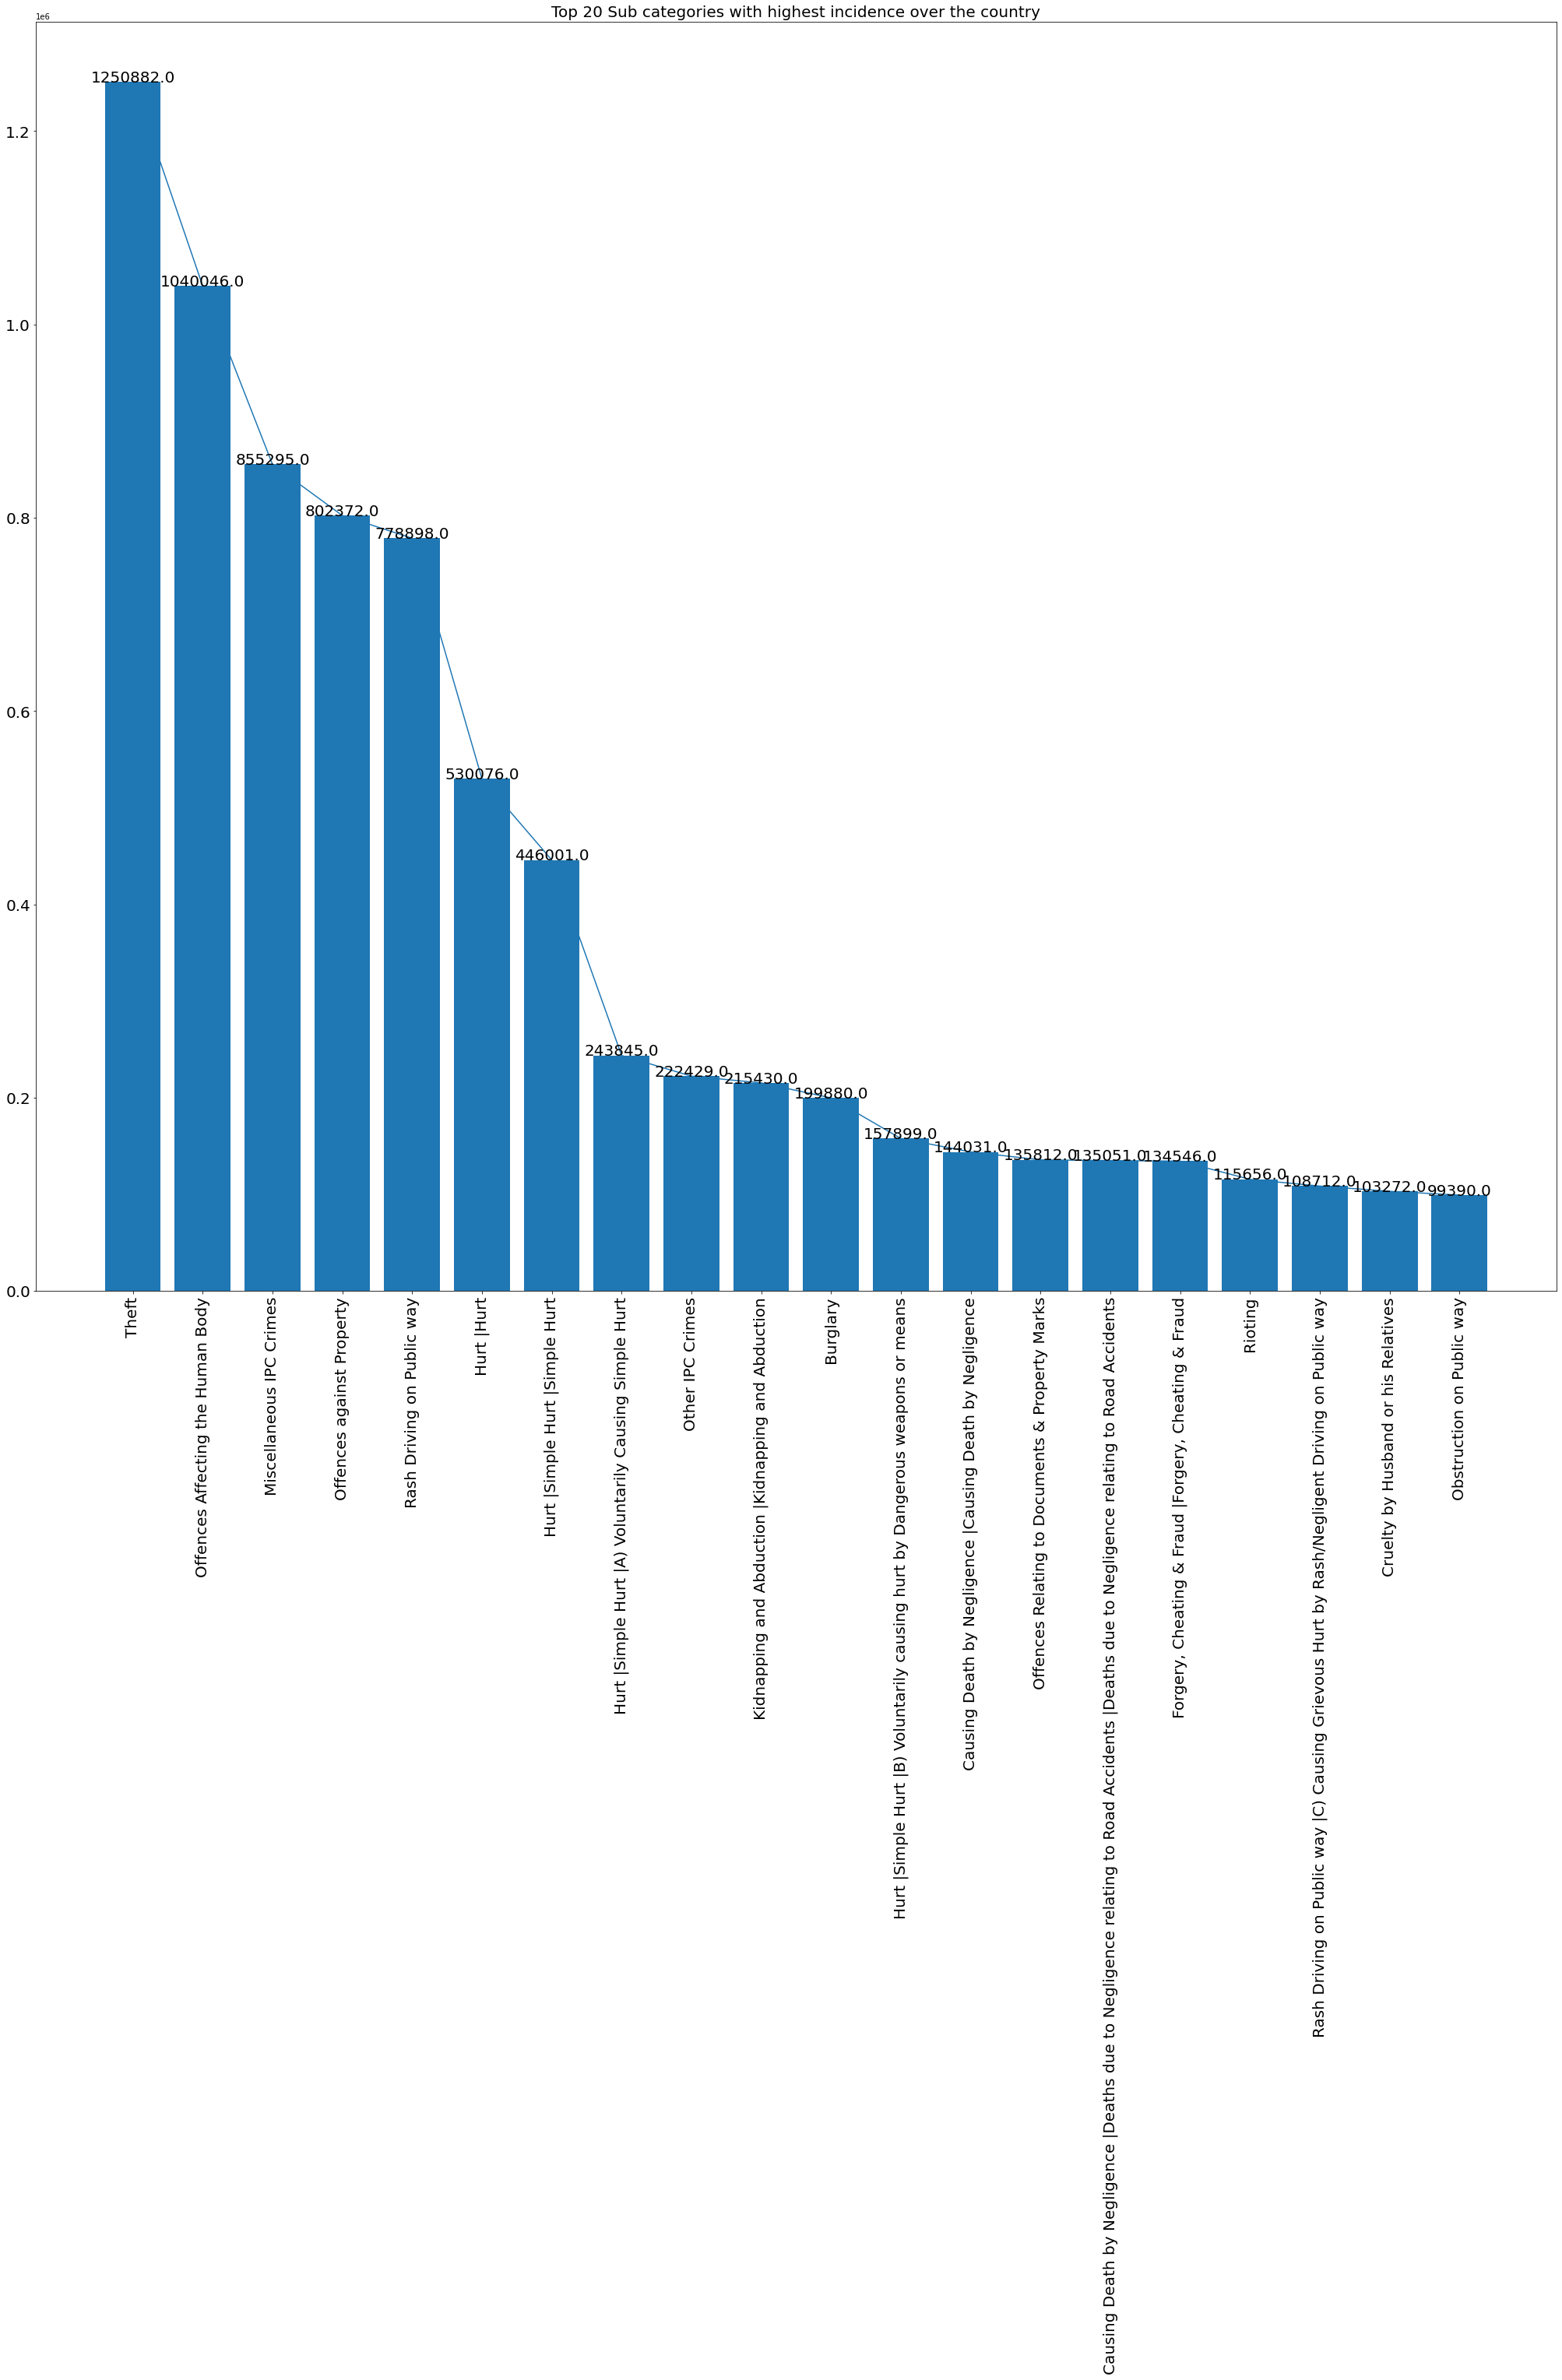

In [477]:
#Top 20 Sub categories of crime according to incidences 
sub_cat_inci=report_final_totalremoved.groupby("Sub_category")[["Incidence","Victims"]].sum().sort_values("Incidence",ascending=False)[0:20]
plt.figure(figsize=(35,30))
plt.title("Top 20 Sub categories with highest incidence over the country",size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.plot(sub_cat_inci.index,sub_cat_inci["Incidence"])
plt.bar(sub_cat_inci.index,sub_cat_inci["Incidence"],align="center")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(sub_cat_inci.index),np.array(sub_cat_inci["Incidence"]))

In [365]:
report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Rape"].sort_values("Crime_rate",ascending=False)

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
505,Chandigarh,2018,Offences affecting the Human Body,Rape,86.000000,86.000000,16.226415
4622,Andaman And Nicobar Islands,2018,Offences affecting the Human Body,Rape,30.000000,30.000000,15.789474
3061,Chhattisgarh,2018,Offences affecting the Human Body,Rape,2091.000000,2101.000000,14.735729
3203,Madhya Pradesh,2018,Offences affecting the Human Body,Rape,5433.000000,5450.000000,13.792841
933,Delhi,2018,Offences affecting the Human Body,Rape,1215.000000,1217.000000,13.322368
1076,Rajasthan,2018,Offences affecting the Human Body,Rape,4335.000000,4337.000000,11.681487
4197,Kerala,2018,Offences affecting the Human Body,Rape,1945.000000,1972.000000,10.686813
647,Uttarakhand,2018,Offences affecting the Human Body,Rape,561.000000,576.000000,10.388889
2493,Assam,2018,Offences affecting the Human Body,Rape,1648.000000,1767.000000,9.868263
790,Haryana,2018,Offences affecting the Human Body,Rape,1296.000000,1296.000000,9.722431


In [509]:
# report_final_totalremoved[report_final_totalremoved["Sub_category"].str.contains("Attempt to Commit Rape")==True].sort_values("Crime_rate",ascending=False)
rape_df=report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Rape"].sort_values("Crime_rate",ascending=False)
dowry_df=report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Dowry Deaths"].sort_values("Incidence",ascending=False)
cruety_by_husband_df=report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Cruelty by Husband or his Relatives"].sort_values("Incidence",ascending=False)
cruety_by_husband_df

,State,Year,Category,Sub_category,Incidence,Victims,Crime_rate
2562,West Bengal,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,16951.000000,17150.000000,35.935976
1146,Uttar Pradesh,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,14233.000000,14361.000000,13.341770
1003,Rajasthan,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,12250.000000,12363.000000,33.009970
2420,Assam,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,11136.000000,11261.000000,66.682635
3414,Maharashtra,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,6862.000000,6882.000000,11.766118
3556,Andhra Pradesh,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,6831.000000,6889.000000,26.273077
4691,Telangana,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,6286.000000,6286.000000,34.163043
3130,Madhya Pradesh,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,4159.000000,4160.000000,10.558517
716,Haryana,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,4154.000000,4195.000000,31.162791
859,Delhi,2018,Miscellaneous IPC Crimes,Cruelty by Husband or his Relatives,3416.000000,3418.000000,37.456140


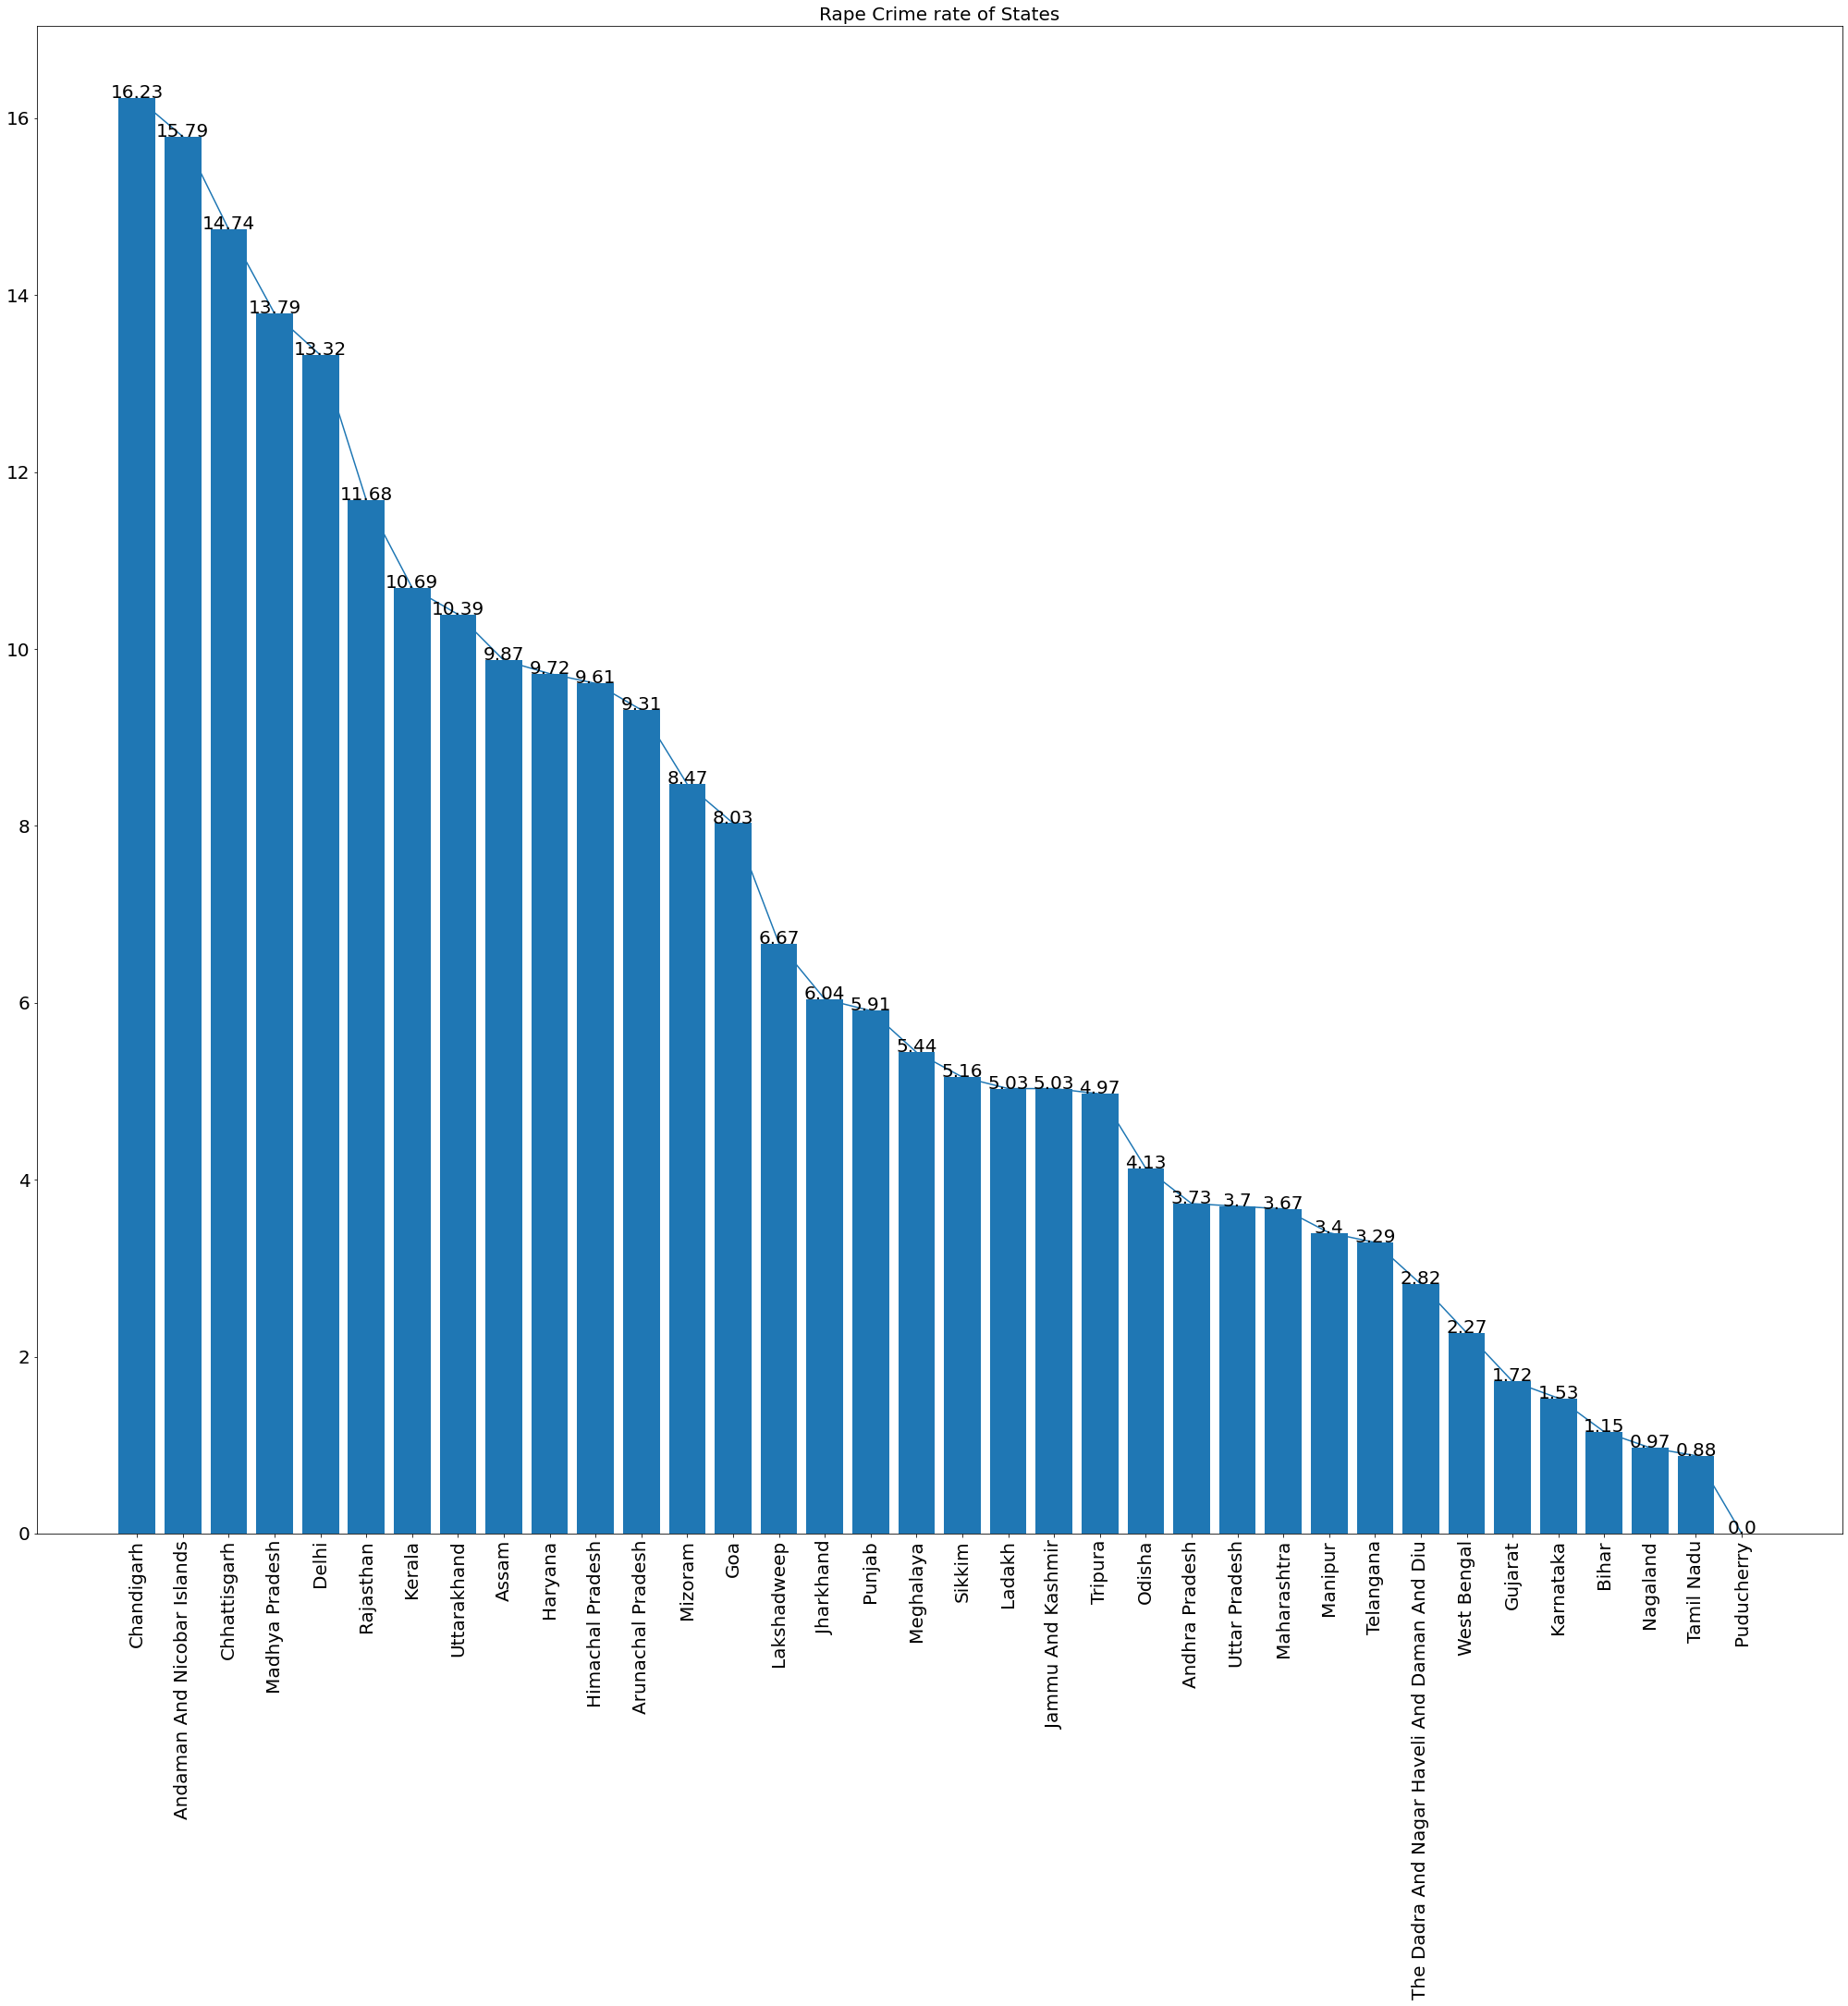

In [381]:
#States according to their Rape Crime rate
state=rape_df["State"]
rape_crimerate=rape_df["Crime_rate"].round(2)
plt.figure(figsize=(35,30))
plt.title("Rape Crime rate of States",size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.plot(state,rape_crimerate)
plt.bar(state,rape_crimerate,align="center")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state),np.array(rape_crimerate))

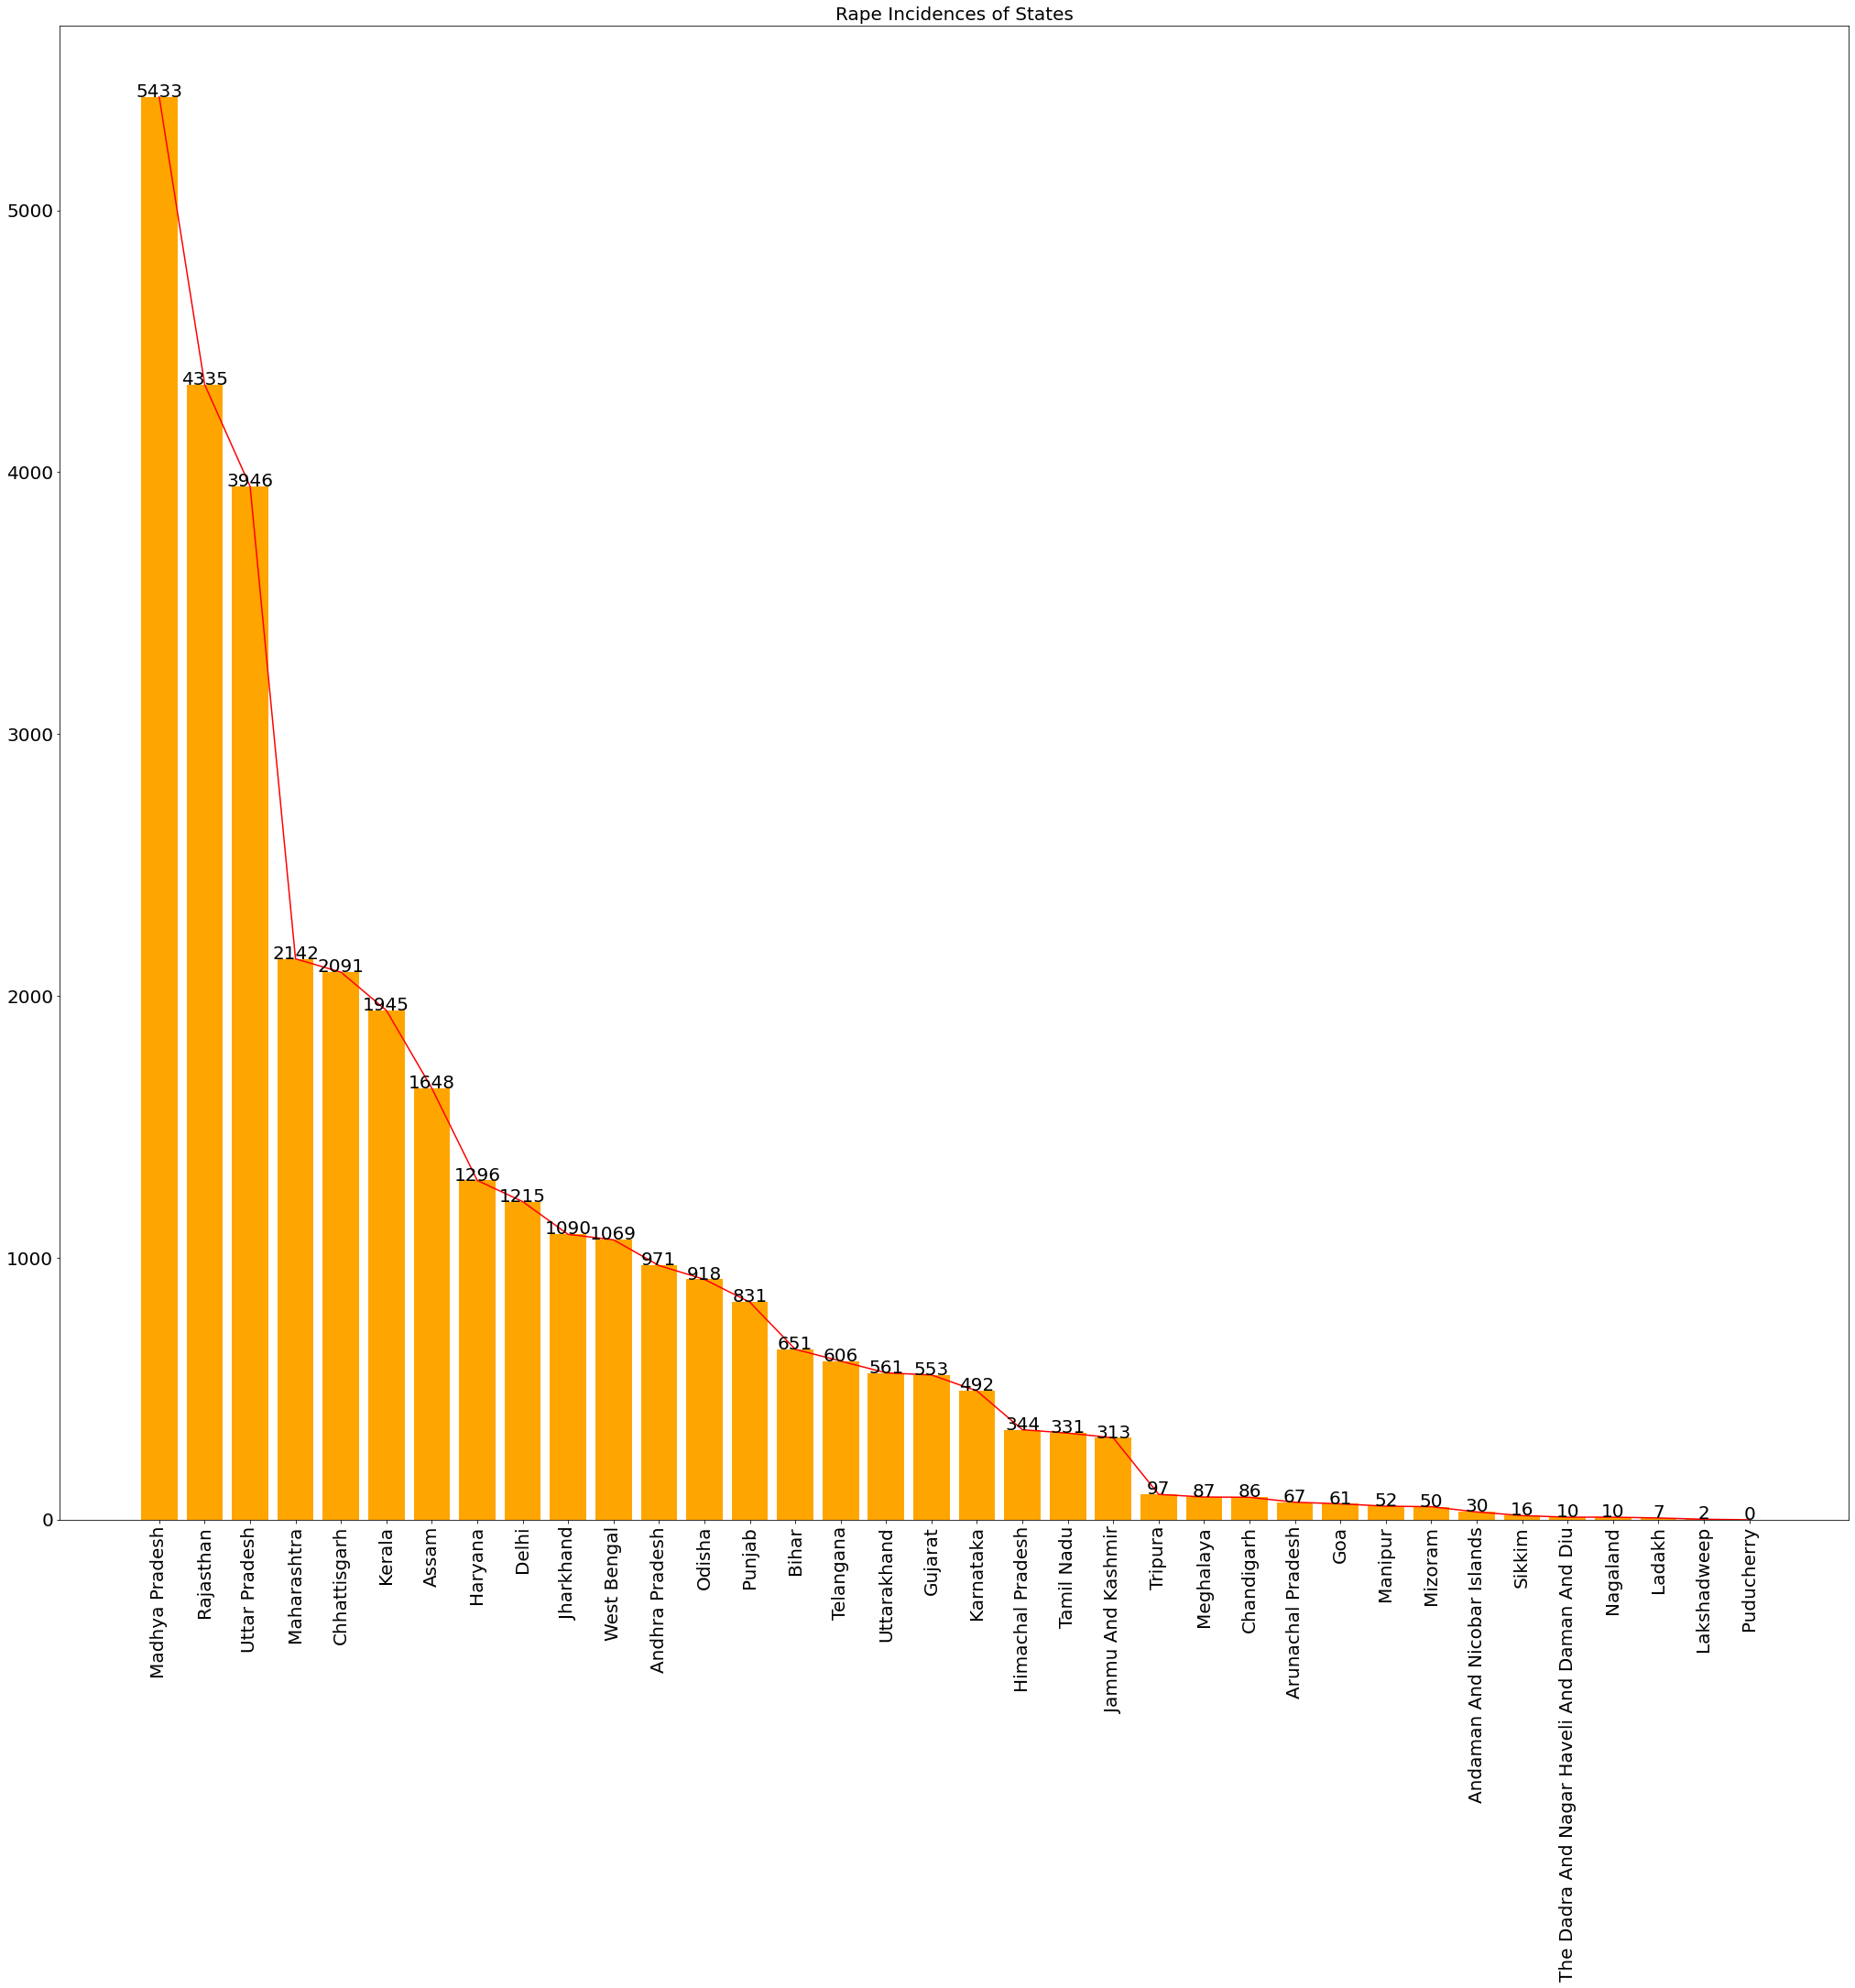

In [493]:
#States according to their Rape Incidences
rape_incidence_df=rape_df.sort_values("Incidence",ascending=False).round()
state= rape_incidence_df["State"]
rape_incidence= rape_incidence_df["Incidence"].astype(int)
plt.figure(figsize=(35,30))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.title("Rape Incidences of States",size=20)
plt.plot(state,rape_incidence,color="red")
plt.bar(state,rape_incidence,align="center",color="orange")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state),np.array(rape_incidence))


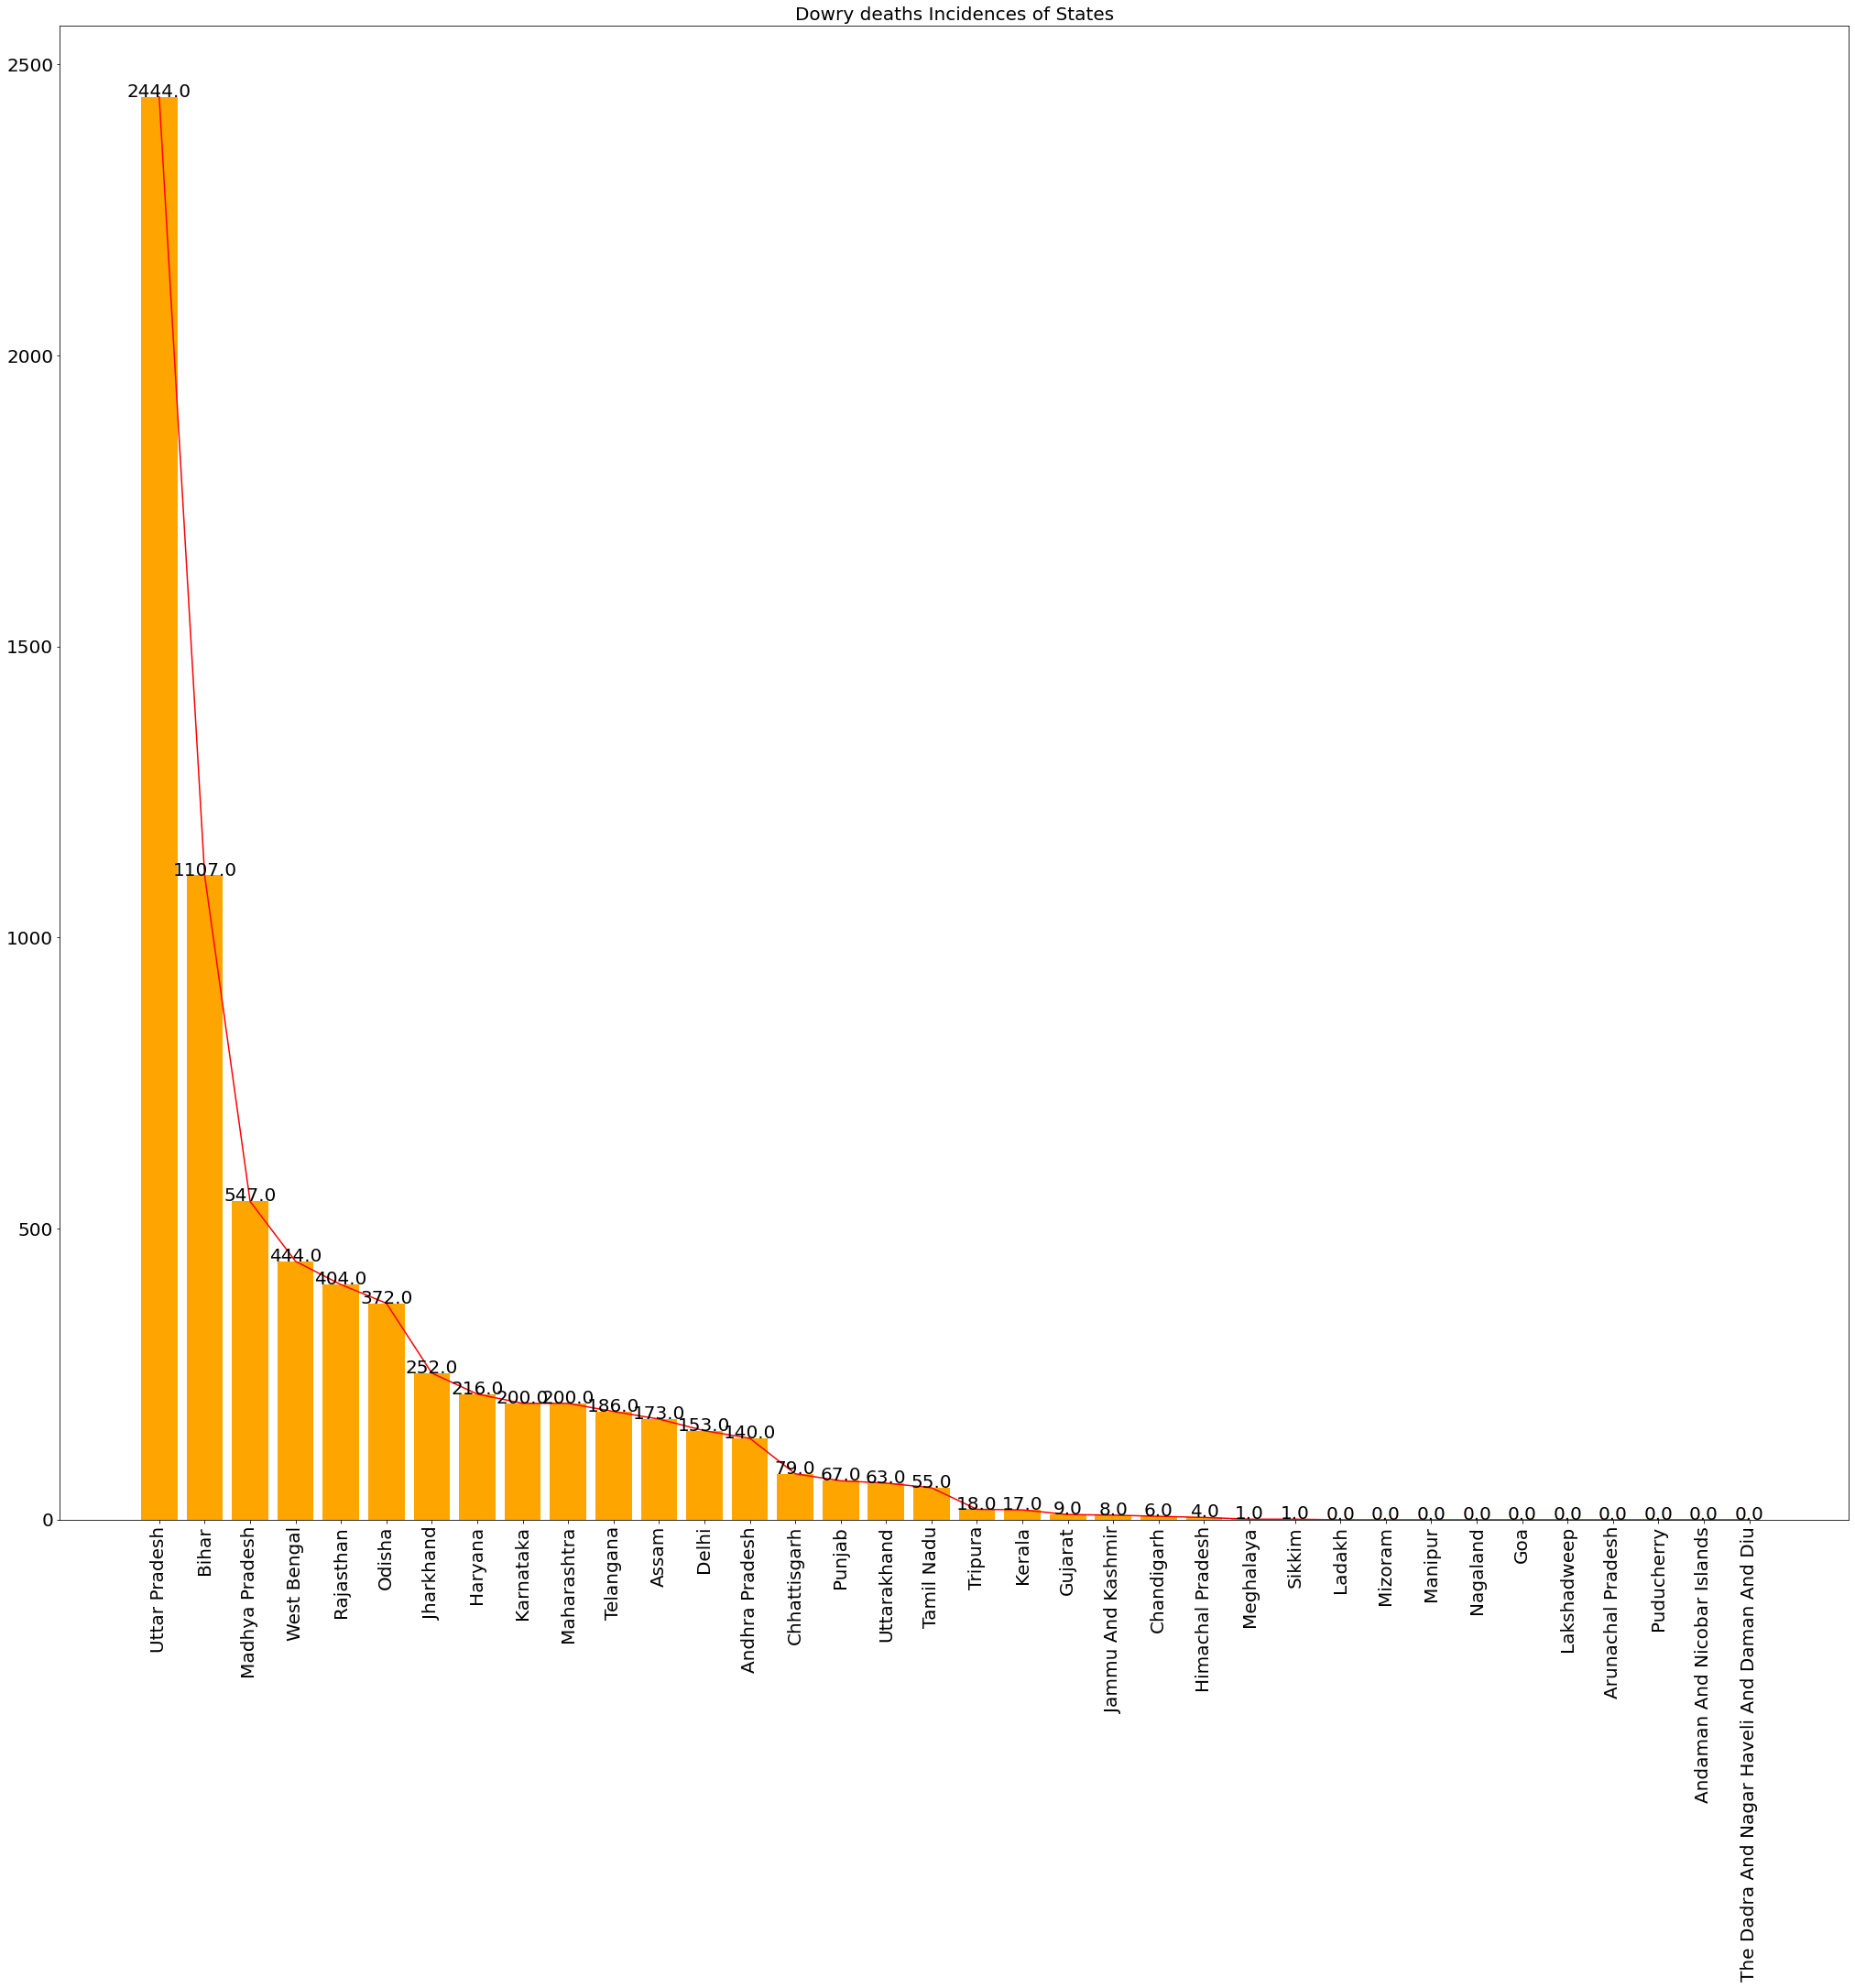

In [510]:
#Top states in Dowry death incidences 
dowry_incidence=dowry_df["Incidence"].round()
state2= dowry_df["State"]
# rape_incidence= rape_incidence_df["Incidence"].astype(int)
plt.figure(figsize=(35,30))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.title("Dowry deaths Incidences of States",size=20)
plt.plot(state2,dowry_incidence,color="red")
plt.bar(state2,dowry_incidence,align="center",color="orange")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state2),np.array(dowry_incidence))

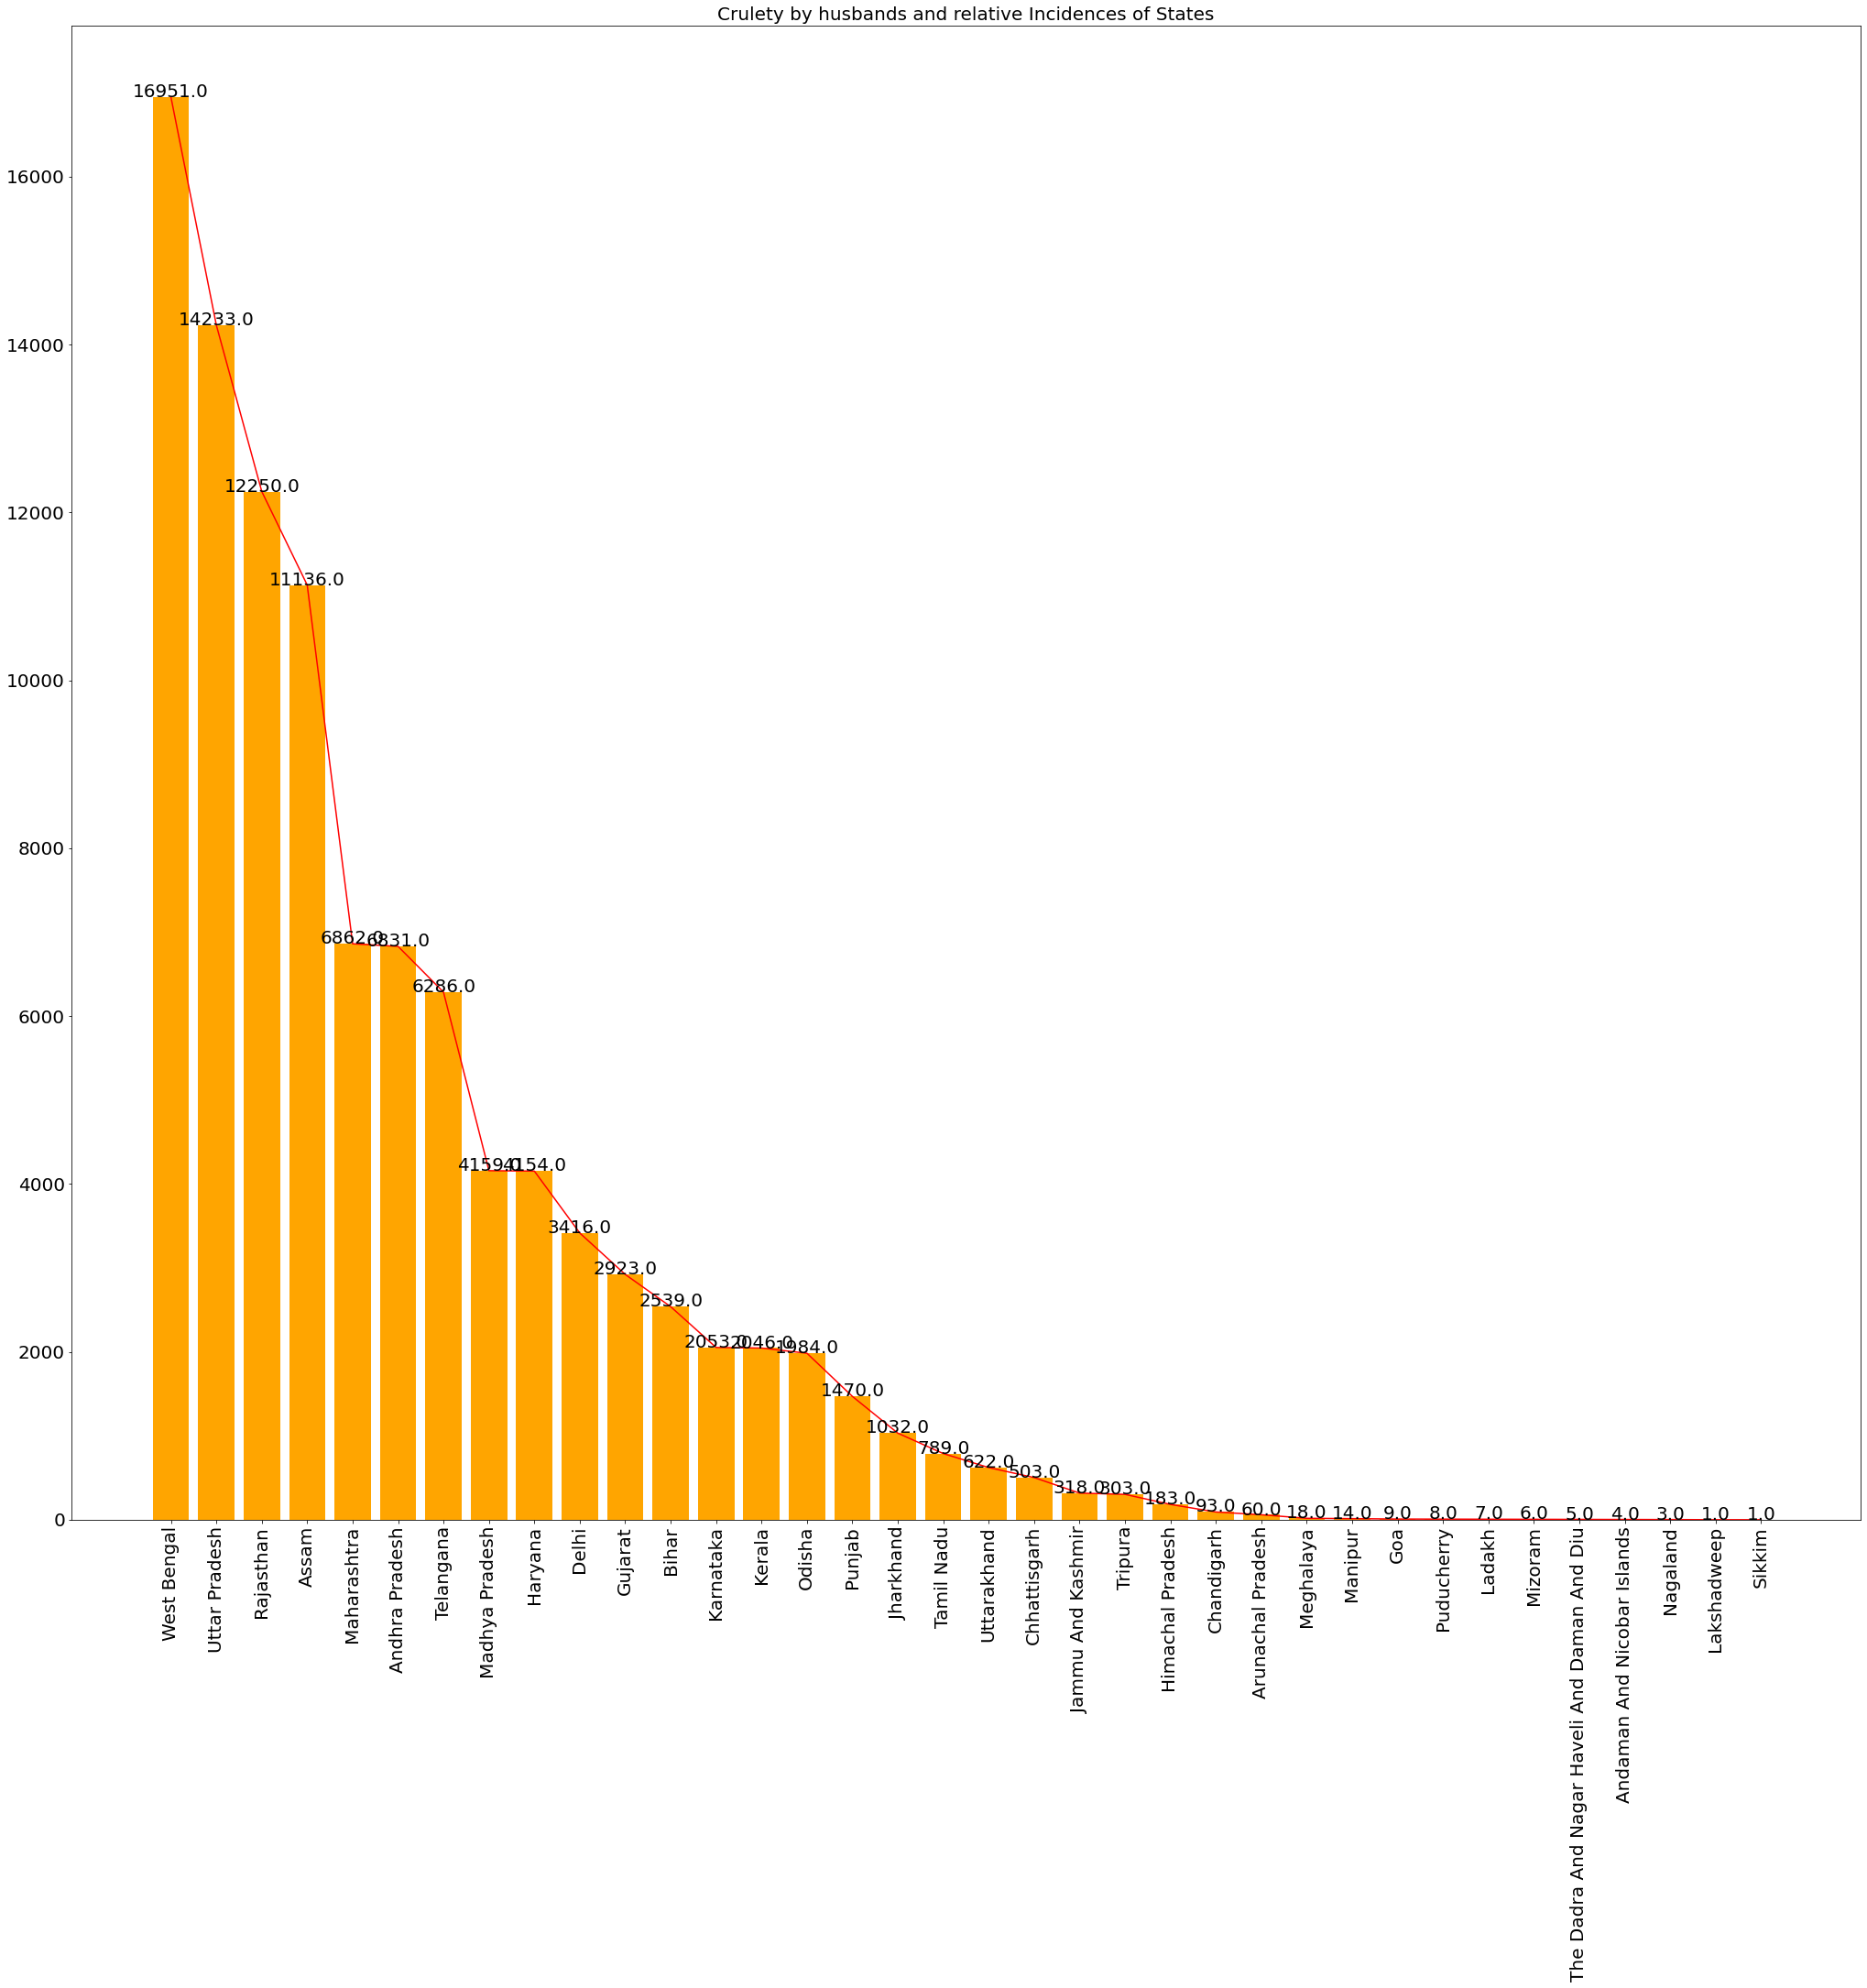

In [511]:
#Top states in cruelty by husband incidences 
cruelty_incidence=cruety_by_husband_df["Incidence"].sort_values(ascending=False).round()
state3= cruety_by_husband_df["State"]
# rape_incidence= rape_incidence_df["Incidence"].astype(int)
plt.figure(figsize=(35,30))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
plt.title("Crulety by husbands and relative Incidences of States",size=20)
plt.plot(state3,cruelty_incidence,color="red")
plt.bar(state3,cruelty_incidence,align="center",color="orange")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(state3),np.array(cruelty_incidence))

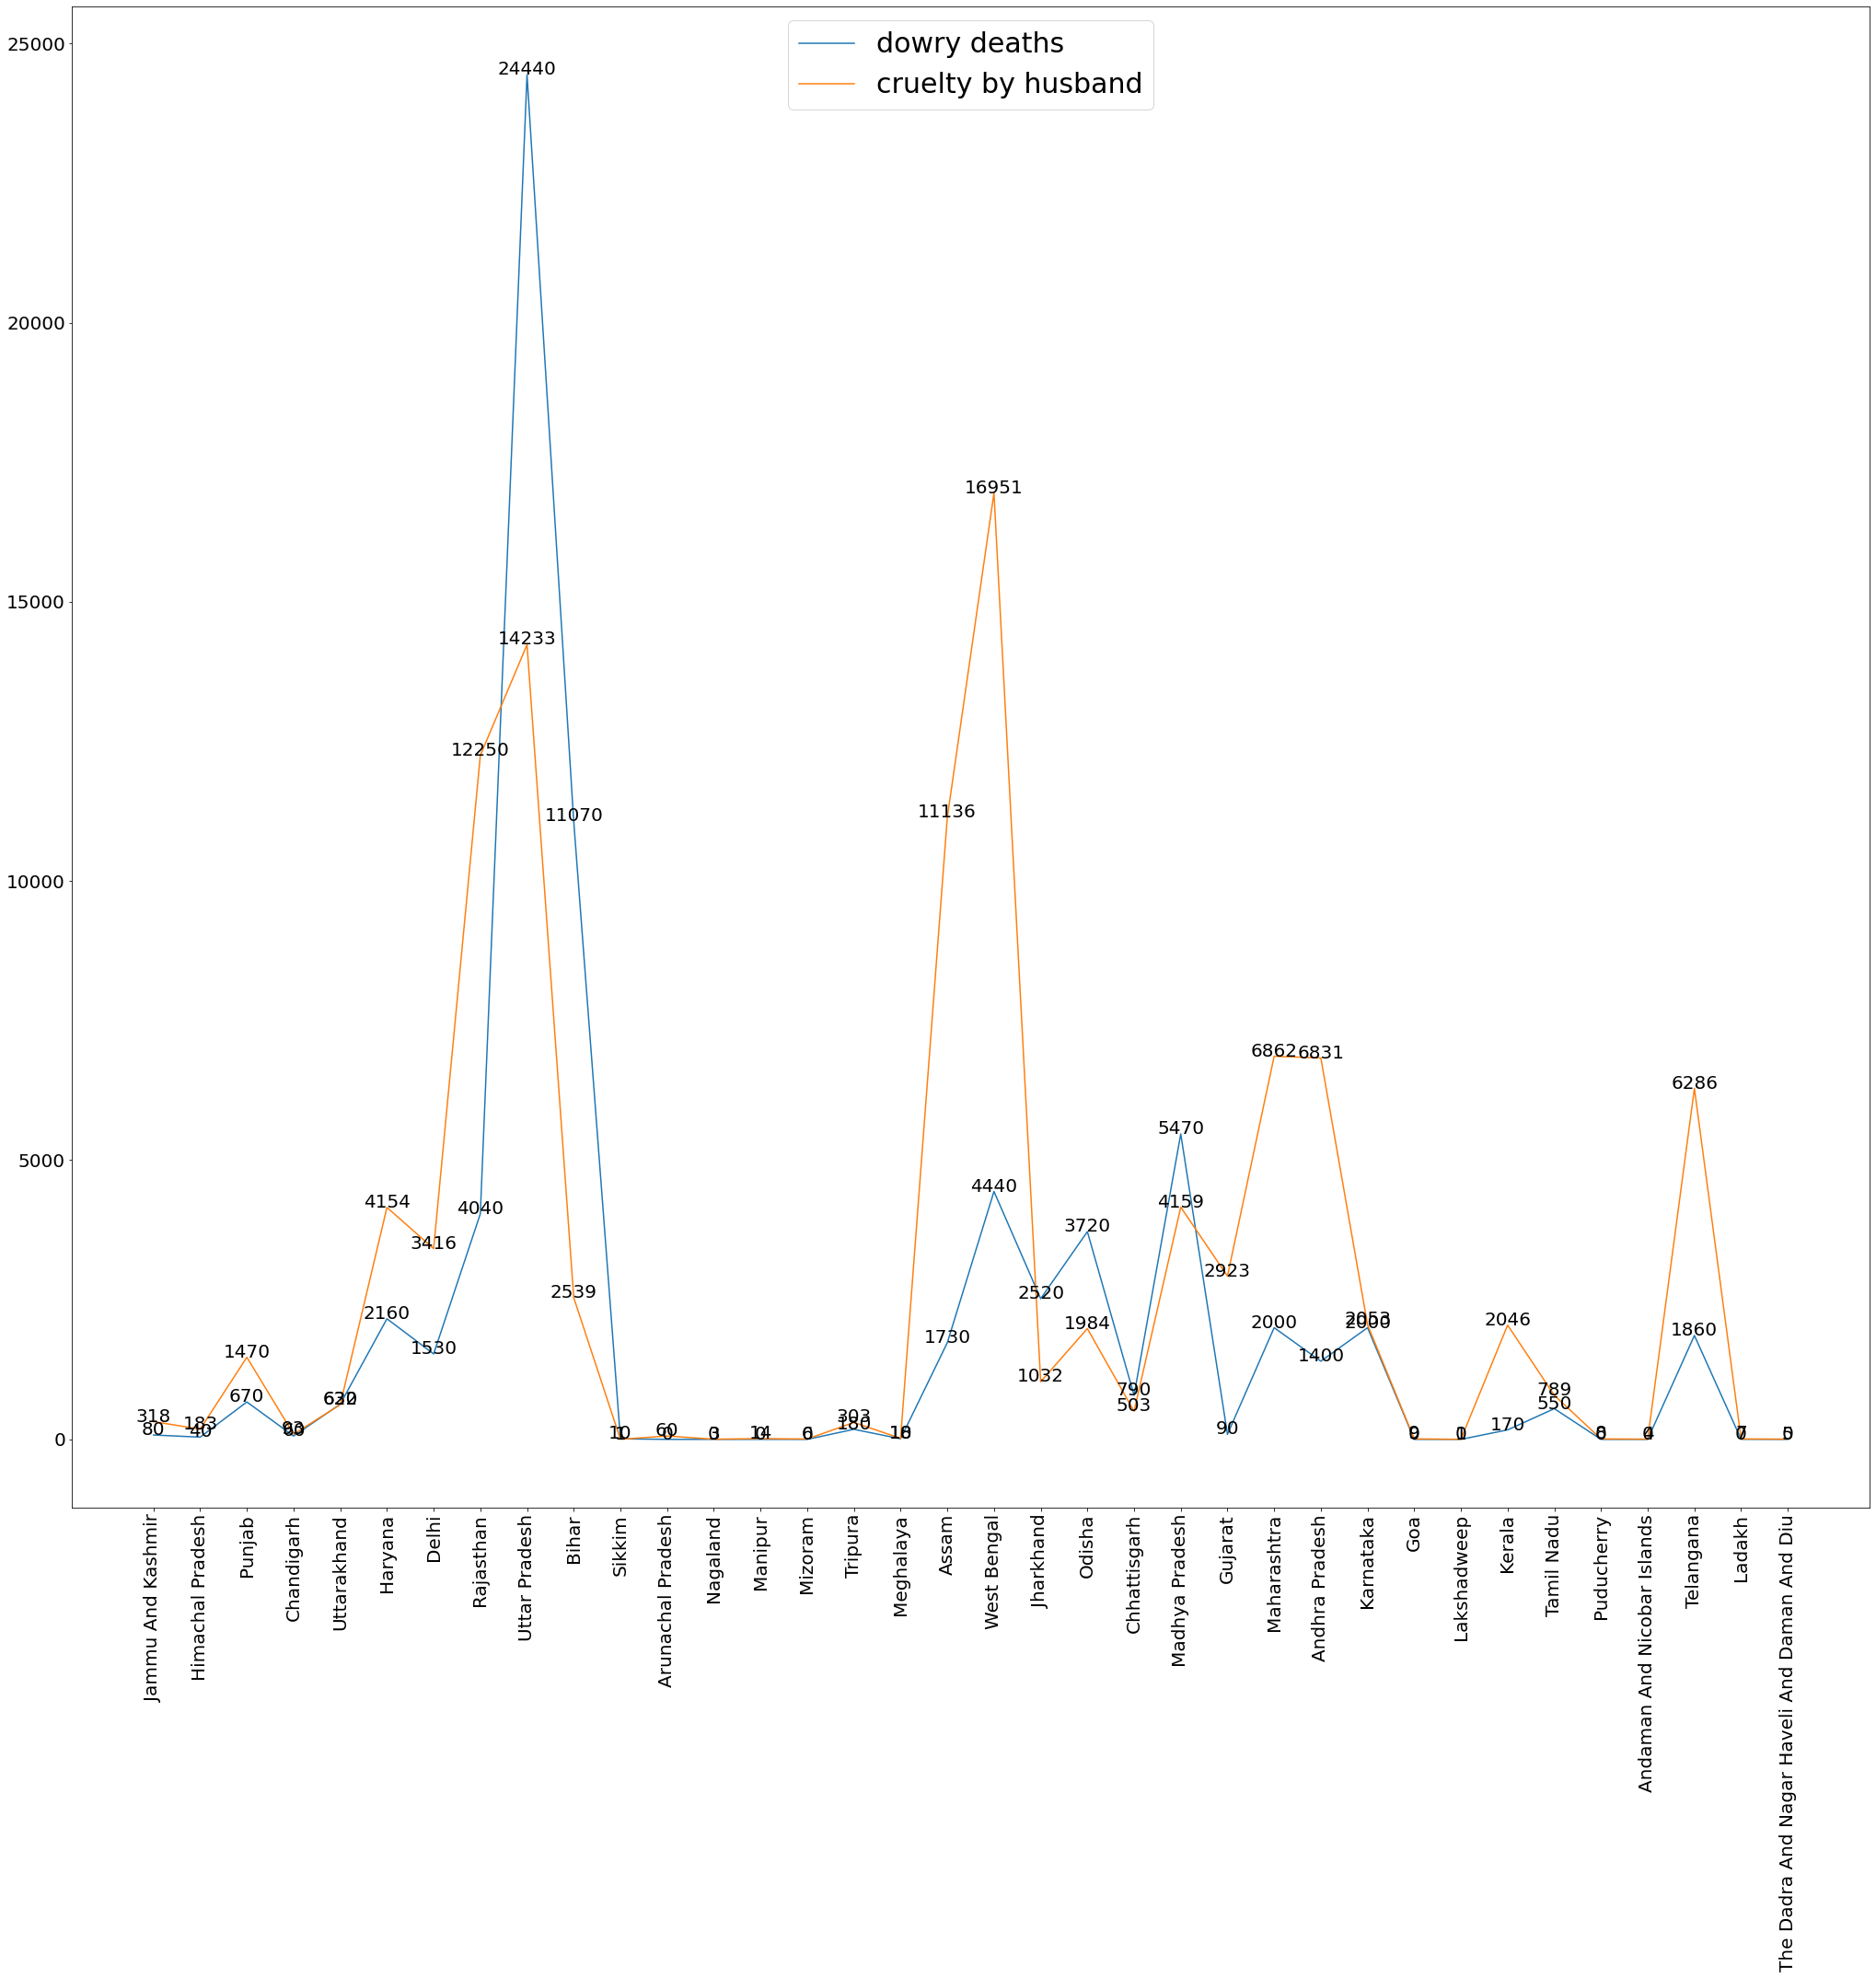

In [529]:
#plot of dowry deaths*10 and cruelty by husbands in each state
plt.figure(figsize=(35,30))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation = 90)
dw=report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Dowry Deaths"]
cw=report_final_totalremoved[report_final_totalremoved["Sub_category"]=="Cruelty by Husband or his Relatives"]
plt.plot(dw["State"],dw["Incidence"]*10)
plt.plot(cw["State"],cw["Incidence"])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],size=20,ha="center");        
addlabels(np.array(dw["State"]),np.array(dw["Incidence"].round().astype(int)*10))
addlabels(np.array(cw["State"]),np.array(cw["Incidence"].round().astype(int)))
plt.legend(['dowry deaths', 'cruelty by husband'],fontsize=30,loc='upper center')

In [530]:
# pd.set_option('display.max_rows',None, "display.max_columns", None)
# report_final_totalremoved["Sub_category"]


In [434]:
#states sorted according to the total incidences of all crimes occuring in the State 
report_final_totalremoved.groupby("State")[["Incidence","Victims"]].sum().sort_values("Incidence",ascending=False)

,Incidence,Victims
State,,
Maharashtra,1.003534e+06,1.031388e+06
Uttar Pradesh,9.611880e+05,1.002787e+06
Madhya Pradesh,7.560220e+05,8.037930e+05
Delhi,7.347620e+05,7.577410e+05
Bihar,6.783660e+05,7.191320e+05
Kerala,5.542470e+05,5.780440e+05
Tamil Nadu,5.371120e+05,5.965690e+05
Rajasthan,4.718250e+05,4.888560e+05
West Bengal,3.919920e+05,4.236660e+05
